In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline
%config InlineBackend.figure_format='retina'
from processing_functions import *
import collections

from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['mathtext.fontset'] = 'dejavuserif'
rcParams['mathtext.rm'] = 'serif'
rcParams['mathtext.it'] = 'serif:italic'
rcParams['mathtext.bf'] = 'serif:bold'
rcParams['axes.titlepad'] = 12

In [2]:
param_list = [r'$\alpha$', r'$\log{M_\mathrm{1}}$', r'$\sigma_{\log{M}}$', r'$\log{M_\mathrm{0}}$', r'$\log{M_{\rm{min}}}$',\
              r'$A_{\rm{cen}}$', r'$A_{\rm{sat}}$']

In [3]:
%store -r
%store

Stored variables and their in-db values:
alphas_cut_19p0                    -> {'va': array([ 0.41260647,  0.32665434,  0.2086277
alphas_cut_19p5                    -> {'va': array([ 0.53724599,  0.35353736,  0.2080467
alphas_cut_20p0                    -> {'va': array([ 0.60749019,  0.40078947,  0.2094946
alphas_cut_20p5                    -> {'va': array([ 0.96461448,  0.40082286,  0.4418812
alphas_cut_21p0                    -> {'va': array([ 1.        ,  0.42539299,  0.2084996
locfit_ca_19p0                     -> array([[  7.14209703e-03,   7.96095987e-03,  -1.18
locfit_ca_19p5                     -> array([[  1.16524998e-04,  -4.12040973e-03,  -1.60
locfit_ca_20p0                     -> array([[  7.66597915e-03,   9.85417654e-03,  -2.83
locfit_ca_20p5                     -> array([[  3.45245846e-02,  -1.73086975e-03,   3.61
locfit_ca_21p0                     -> array([[  6.45104550e-02,  -5.04293980e-02,  -3.49
locfit_wd_19p0                     -> array([[  1.34903252e-03,   1.1

In [4]:
keylist = ['w','d','v','c','a','r','wd','wv','wc','wa','wr','dv','dc','da','dr','vc','va','vr','ca','cr','ar',\
        'wdv','wdc','wda','wdr','wvc','wva','wvr','wca','wcr','war','dvc','dva','dvr','dca','dcr','dar',\
         'vca','vcr','var','car','wdvc','wdva','wdvr','wdca','wdcr','wdar','wvca','wvcr','wvar','wcar',\
        'dvca','dvcr','dvar','dcar','vcar','wdvca','wdvcr','wdvar','wdcar','wvcar','dvcar','wdvcar']

In [5]:
comblist = [r'$w_\mathrm{p}(r_\mathrm{p})$',r'$\Delta\Sigma(r_\mathrm{p})$',\
            r'$w_\mathrm{p}(r_\mathrm{p})+\Delta\Sigma(r_\mathrm{p})$',\
            r'$w_\mathrm{p}(r_\mathrm{p})+\Delta\Sigma(r_\mathrm{p})+VPF(r)$','$VPF(r)$',\
            r'$\rm{CIC}$',r'$\rm{CIA}$',r'$Q(N_{\mathrm{1}}/N_{\mathrm{2}})$',\
            r'$w_\mathrm{p}(r_\mathrm{p})+\rm{CIC}$',r'$w_\mathrm{p}(r_\mathrm{p})+\rm{CIA}$',\
            r'$w_\mathrm{p}(r_\mathrm{p})+Q(N_{\mathrm{1}}/N_{\mathrm{2}})$',\
            r'$w_\mathrm{p}(r_\mathrm{p})+\rm{CIC}+\rm{CIA}$',\
            r'$w_\mathrm{p}(r_\mathrm{p})+\rm{CIC}+Q(N_{\mathrm{1}}/N_{\mathrm{2}})$',\
            r'$w_\mathrm{p}(r_\mathrm{p})+\rm{CIA}+Q(N_{\mathrm{1}}/N_{\mathrm{2}})$',\
            r'$w_\mathrm{p}(r_\mathrm{p})+\Delta\Sigma(r_\mathrm{p})+VPF(r)+$'+'\n'+r'$\rm{CIC}+\rm{CIA}+Q(N_{\mathrm{1}}/N_{\mathrm{2}})$']

In [6]:
combidx = [0,1,6,21,2,3,4,5,8,9,10,28,29,30,62]
np.array(keylist)[combidx]

array(['w', 'd', 'wd', 'wdv', 'v', 'c', 'a', 'r', 'wc', 'wa', 'wr', 'wca',
       'wcr', 'war', 'wdvcar'],
      dtype='|S6')

In [9]:
def cov_to_1sigma(cov):
    return np.sqrt(cov.diagonal())

In [13]:
sigmadict_19p0 = apply_to_dict(cov_to_1sigma,postcov_bundles_1_19p0[0])
sigmadict_19p5 = apply_to_dict(cov_to_1sigma,postcov_bundles_1_19p5[0])
sigmadict_20p0 = apply_to_dict(cov_to_1sigma,postcov_bundles_1_20p0[0])
sigmadict_20p5 = apply_to_dict(cov_to_1sigma,postcov_bundles_1_20p5[0])
sigmadict_21p0 = apply_to_dict(cov_to_1sigma,postcov_bundles_1_21p0[0])

sigmalist_19p0 = []
sigmalist_19p5 = []
sigmalist_20p0 = []
sigmalist_20p5 = []
sigmalist_21p0 = []

for k in keylist:
    sigmalist_19p0.append(sigmadict_19p0[k])
    sigmalist_19p5.append(sigmadict_19p5[k])
    sigmalist_20p0.append(sigmadict_20p0[k])
    sigmalist_20p5.append(sigmadict_20p5[k])
    sigmalist_21p0.append(sigmadict_21p0[k])
    
sigmalist_19p0 = np.array(sigmalist_19p0)
sigmalist_19p5 = np.array(sigmalist_19p5)
sigmalist_20p0 = np.array(sigmalist_20p0)
sigmalist_20p5 = np.array(sigmalist_20p5)
sigmalist_21p0 = np.array(sigmalist_21p0)

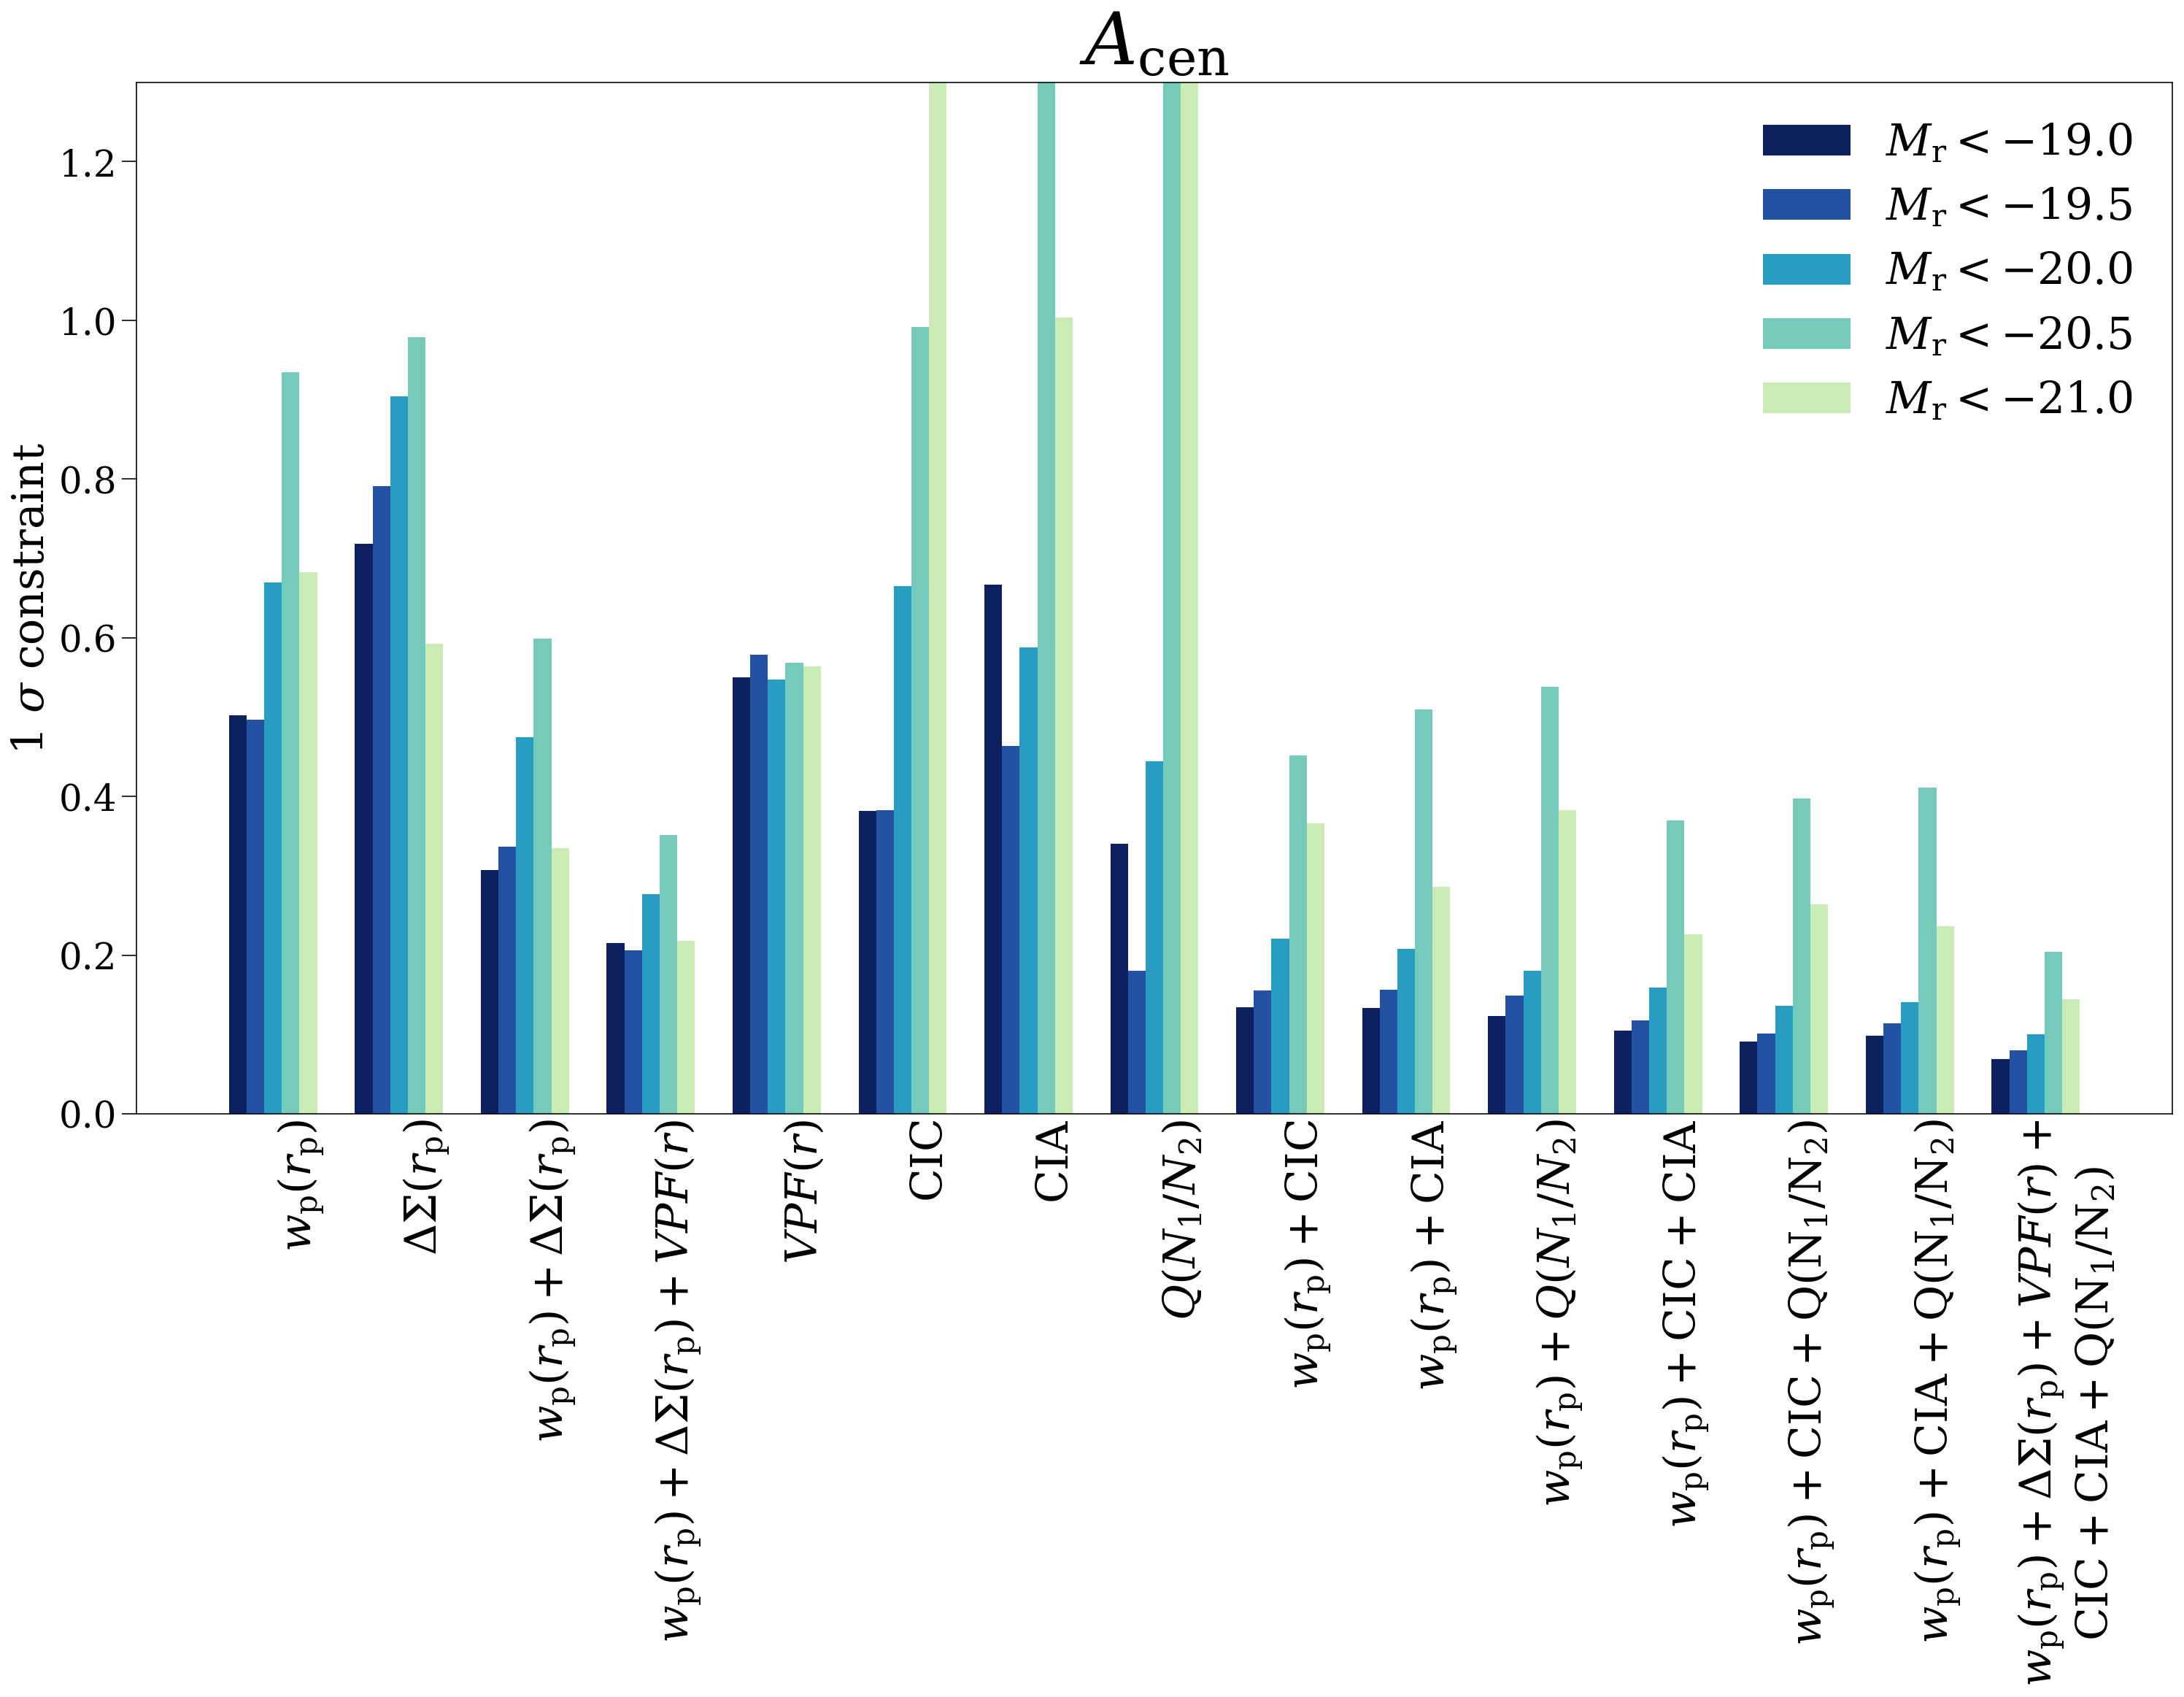

In [14]:
N = 15

ind = np.arange(N)  # the x locations for the groups
width = 0.14       # the width of the bars

fig, ax = plt.subplots(figsize=(25,13))
rects1 = ax.bar(ind, sigmalist_19p0[combidx,5], width, color=cm.YlGnBu(250))
rects2 = ax.bar(ind+width, sigmalist_19p5[combidx,5], width, color=cm.YlGnBu(200))
rects3 = ax.bar(ind+width*2, sigmalist_20p0[combidx,5], width, color=cm.YlGnBu(150))
rects4 = ax.bar(ind+width*3, sigmalist_20p5[combidx,5], width, color=cm.YlGnBu(100))
rects5 = ax.bar(ind+width*4, sigmalist_21p0[combidx,5], width, color=cm.YlGnBu(60))

# add some text for labels, title and axes ticks
ax.set_ylabel(r'$1\ \sigma\ \rm{constraint}$',fontsize=30)
ax.set_title(r'$A_{\rm{cen}}$',fontsize=50)
ax.set_xticks(np.arange(N)+0.5)
ax.set_xticklabels(comblist,rotation=90,fontsize=30)
ax.set_yticklabels([0.0,0.2,0.4,0.6,0.8,1.0,1.2],fontsize=25)
ax.tick_params(axis='x',length=0)
ax.tick_params(axis='y',length=10)


ax.legend((rects1[0], rects2[0], rects3[0], rects4[0], rects5[0]),\
          (r'$M_{\rm{r}}<-19.0$',r'$M_{\rm{r}}<-19.5$',r'$M_{\rm{r}}<-20.0$',r'$M_{\rm{r}}<-20.5$',r'$M_{\rm{r}}<-21.0$'),frameon=False,fontsize=30)

ax.set_ylim(0,1.3)

plt.show()

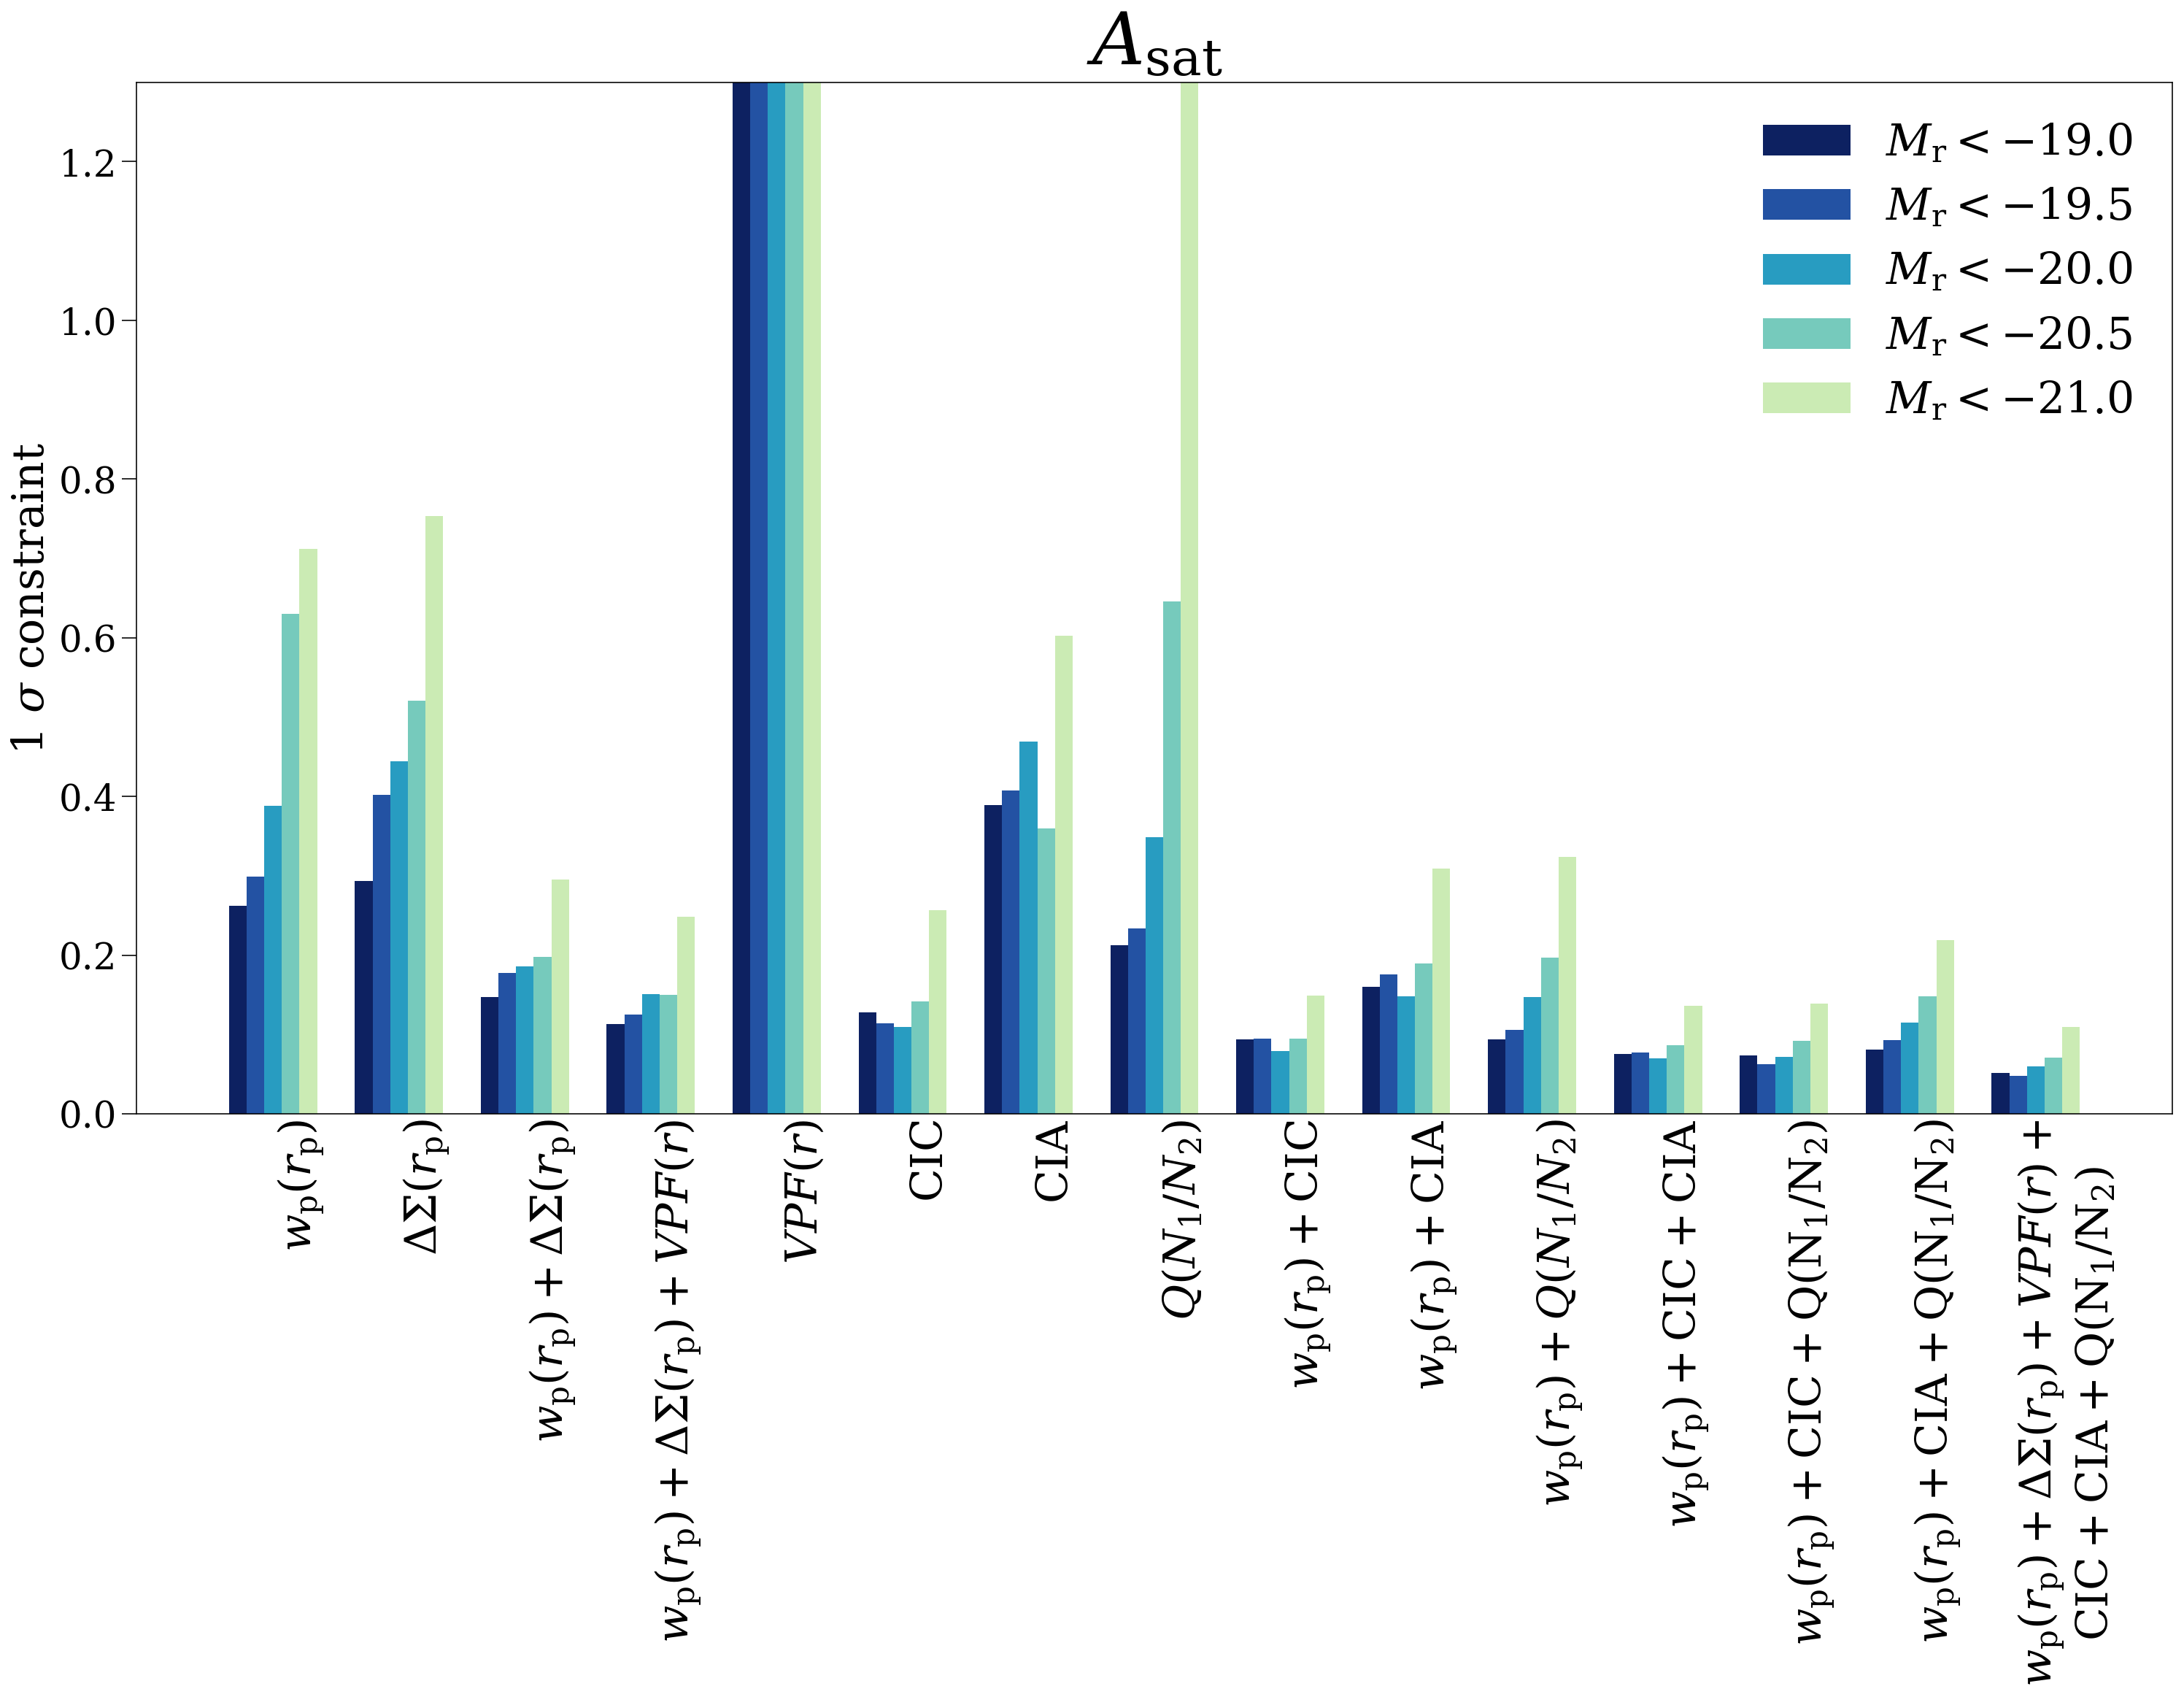

In [15]:
N = 15

ind = np.arange(N)  # the x locations for the groups
width = 0.14       # the width of the bars

fig, ax = plt.subplots(figsize=(25,13))
rects1 = ax.bar(ind, sigmalist_19p0[combidx,6], width, color=cm.YlGnBu(250))
rects2 = ax.bar(ind+width, sigmalist_19p5[combidx,6], width, color=cm.YlGnBu(200))
rects3 = ax.bar(ind+width*2, sigmalist_20p0[combidx,6], width, color=cm.YlGnBu(150))
rects4 = ax.bar(ind+width*3, sigmalist_20p5[combidx,6], width, color=cm.YlGnBu(100))
rects5 = ax.bar(ind+width*4, sigmalist_21p0[combidx,6], width, color=cm.YlGnBu(60))

# add some text for labels, title and axes ticks
ax.set_ylabel(r'$1\ \sigma\ \rm{constraint}$',fontsize=30)
ax.set_title(r'$A_{\rm{sat}}$',fontsize=50)
ax.set_xticks(np.arange(N)+0.5)
ax.set_xticklabels(comblist,rotation=90,fontsize=30)
ax.set_yticklabels([0.0,0.2,0.4,0.6,0.8,1.0,1.2],fontsize=25)
ax.tick_params(axis='x',length=0)
ax.tick_params(axis='y',length=10)


ax.legend((rects1[0], rects2[0], rects3[0], rects4[0], rects5[0]),\
          (r'$M_{\rm{r}}<-19.0$',r'$M_{\rm{r}}<-19.5$',r'$M_{\rm{r}}<-20.0$',r'$M_{\rm{r}}<-20.5$',r'$M_{\rm{r}}<-21.0$'),frameon=False,fontsize=30)

ax.set_ylim(0,1.3)

plt.show()

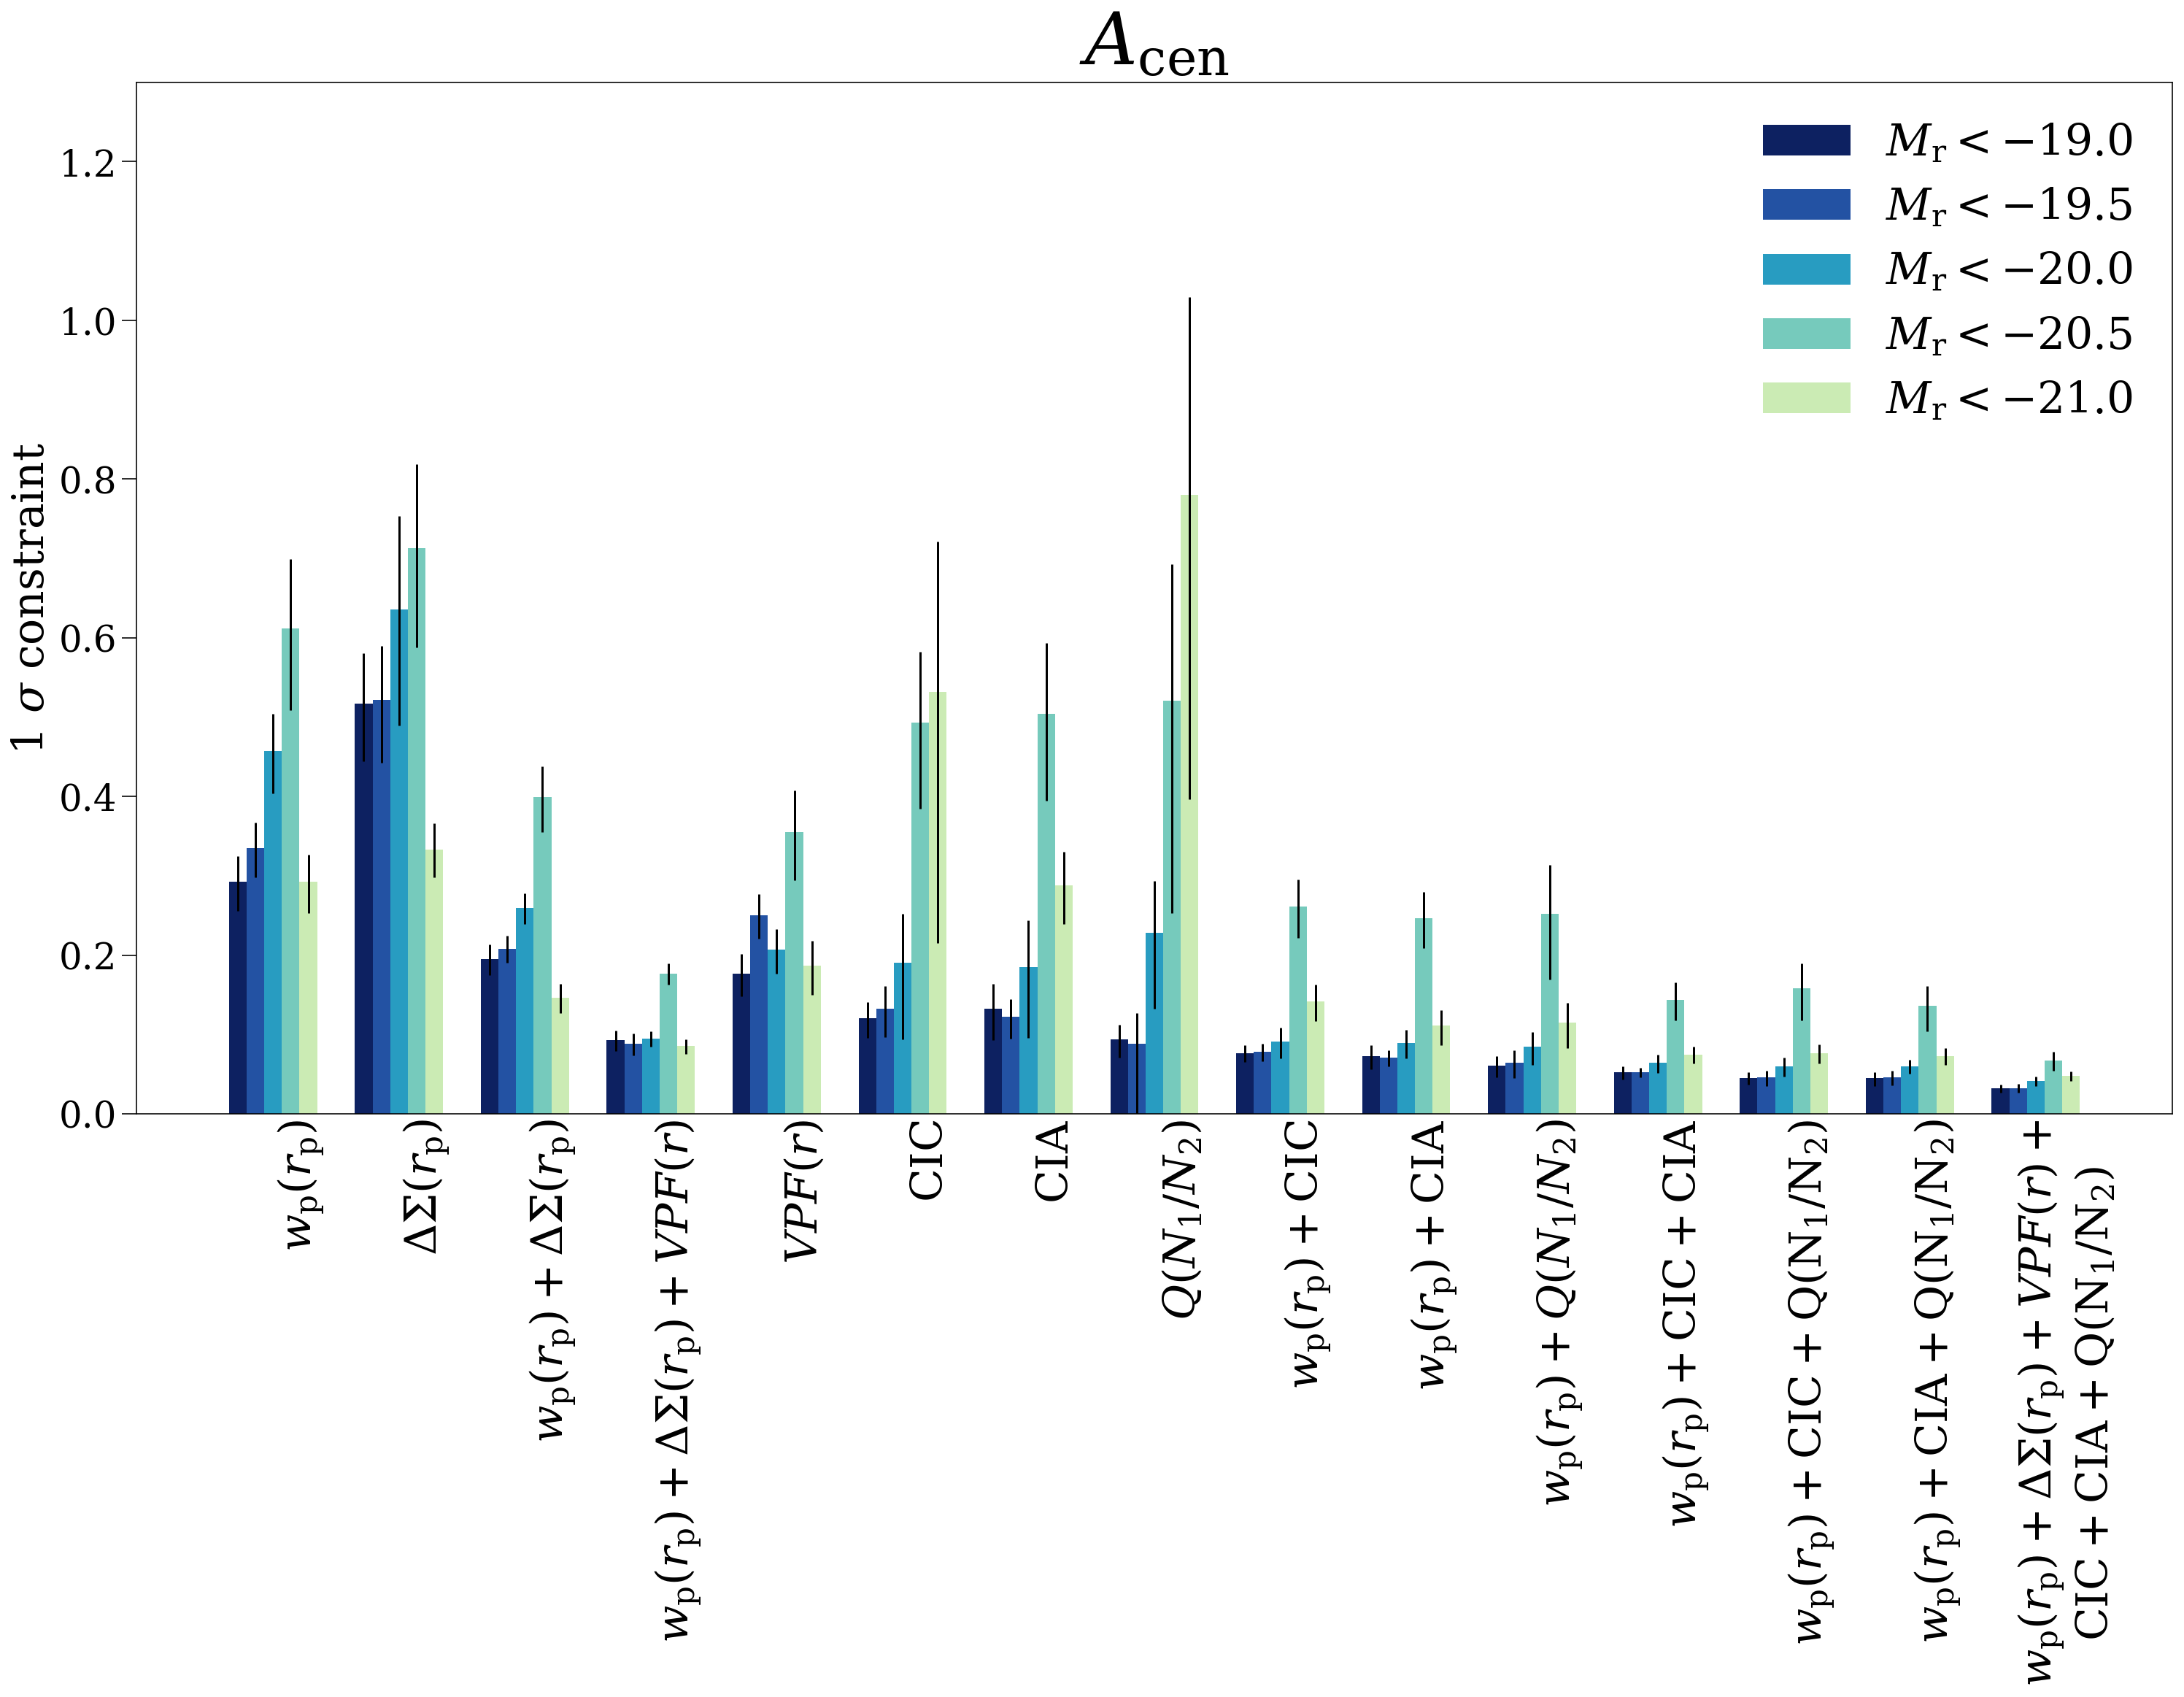

In [42]:
N = 15

ind = np.arange(N)  # the x locations for the groups
width = 0.14       # the width of the bars

fig, ax = plt.subplots(figsize=(25,13))
rects1 = ax.bar(ind, sigma_mean_19p0[combidx,5], width, color=cm.YlGnBu(250), yerr=[sigma_stdm_19p0[combidx,5],sigma_stdp_19p0[combidx,5]])
rects2 = ax.bar(ind+width, sigma_mean_19p5[combidx,5], width, color=cm.YlGnBu(200), yerr=[sigma_stdm_19p5[combidx,5],sigma_stdp_19p5[combidx,5]])
rects3 = ax.bar(ind+width*2, sigma_mean_20p0[combidx,5], width, color=cm.YlGnBu(150), yerr=[sigma_stdm_20p0[combidx,5],sigma_stdp_20p0[combidx,5]])
rects4 = ax.bar(ind+width*3, sigma_mean_20p5[combidx,5], width, color=cm.YlGnBu(100), yerr=[sigma_stdm_20p5[combidx,5],sigma_stdp_20p5[combidx,5]])
rects5 = ax.bar(ind+width*4, sigma_mean_21p0[combidx,5], width, color=cm.YlGnBu(60), yerr=[sigma_stdm_21p0[combidx,5],sigma_stdp_21p0[combidx,5]])

# add some text for labels, title and axes ticks
ax.set_ylabel(r'$1\ \sigma\ \rm{constraint}$',fontsize=30)
ax.set_title(r'$A_{\rm{cen}}$',fontsize=50)
ax.set_xticks(np.arange(N)+0.5)
ax.set_xticklabels(comblist,rotation=90,fontsize=30)
ax.set_yticklabels([0.0,0.2,0.4,0.6,0.8,1.0,1.2],fontsize=25)
ax.tick_params(axis='x',length=0)
ax.tick_params(axis='y',length=10)


ax.legend((rects1[0], rects2[0], rects3[0], rects4[0], rects5[0]),\
          (r'$M_{\rm{r}}<-19.0$',r'$M_{\rm{r}}<-19.5$',r'$M_{\rm{r}}<-20.0$',r'$M_{\rm{r}}<-20.5$',r'$M_{\rm{r}}<-21.0$'),frameon=False,fontsize=30)

ax.set_ylim(0,1.3)

plt.show()

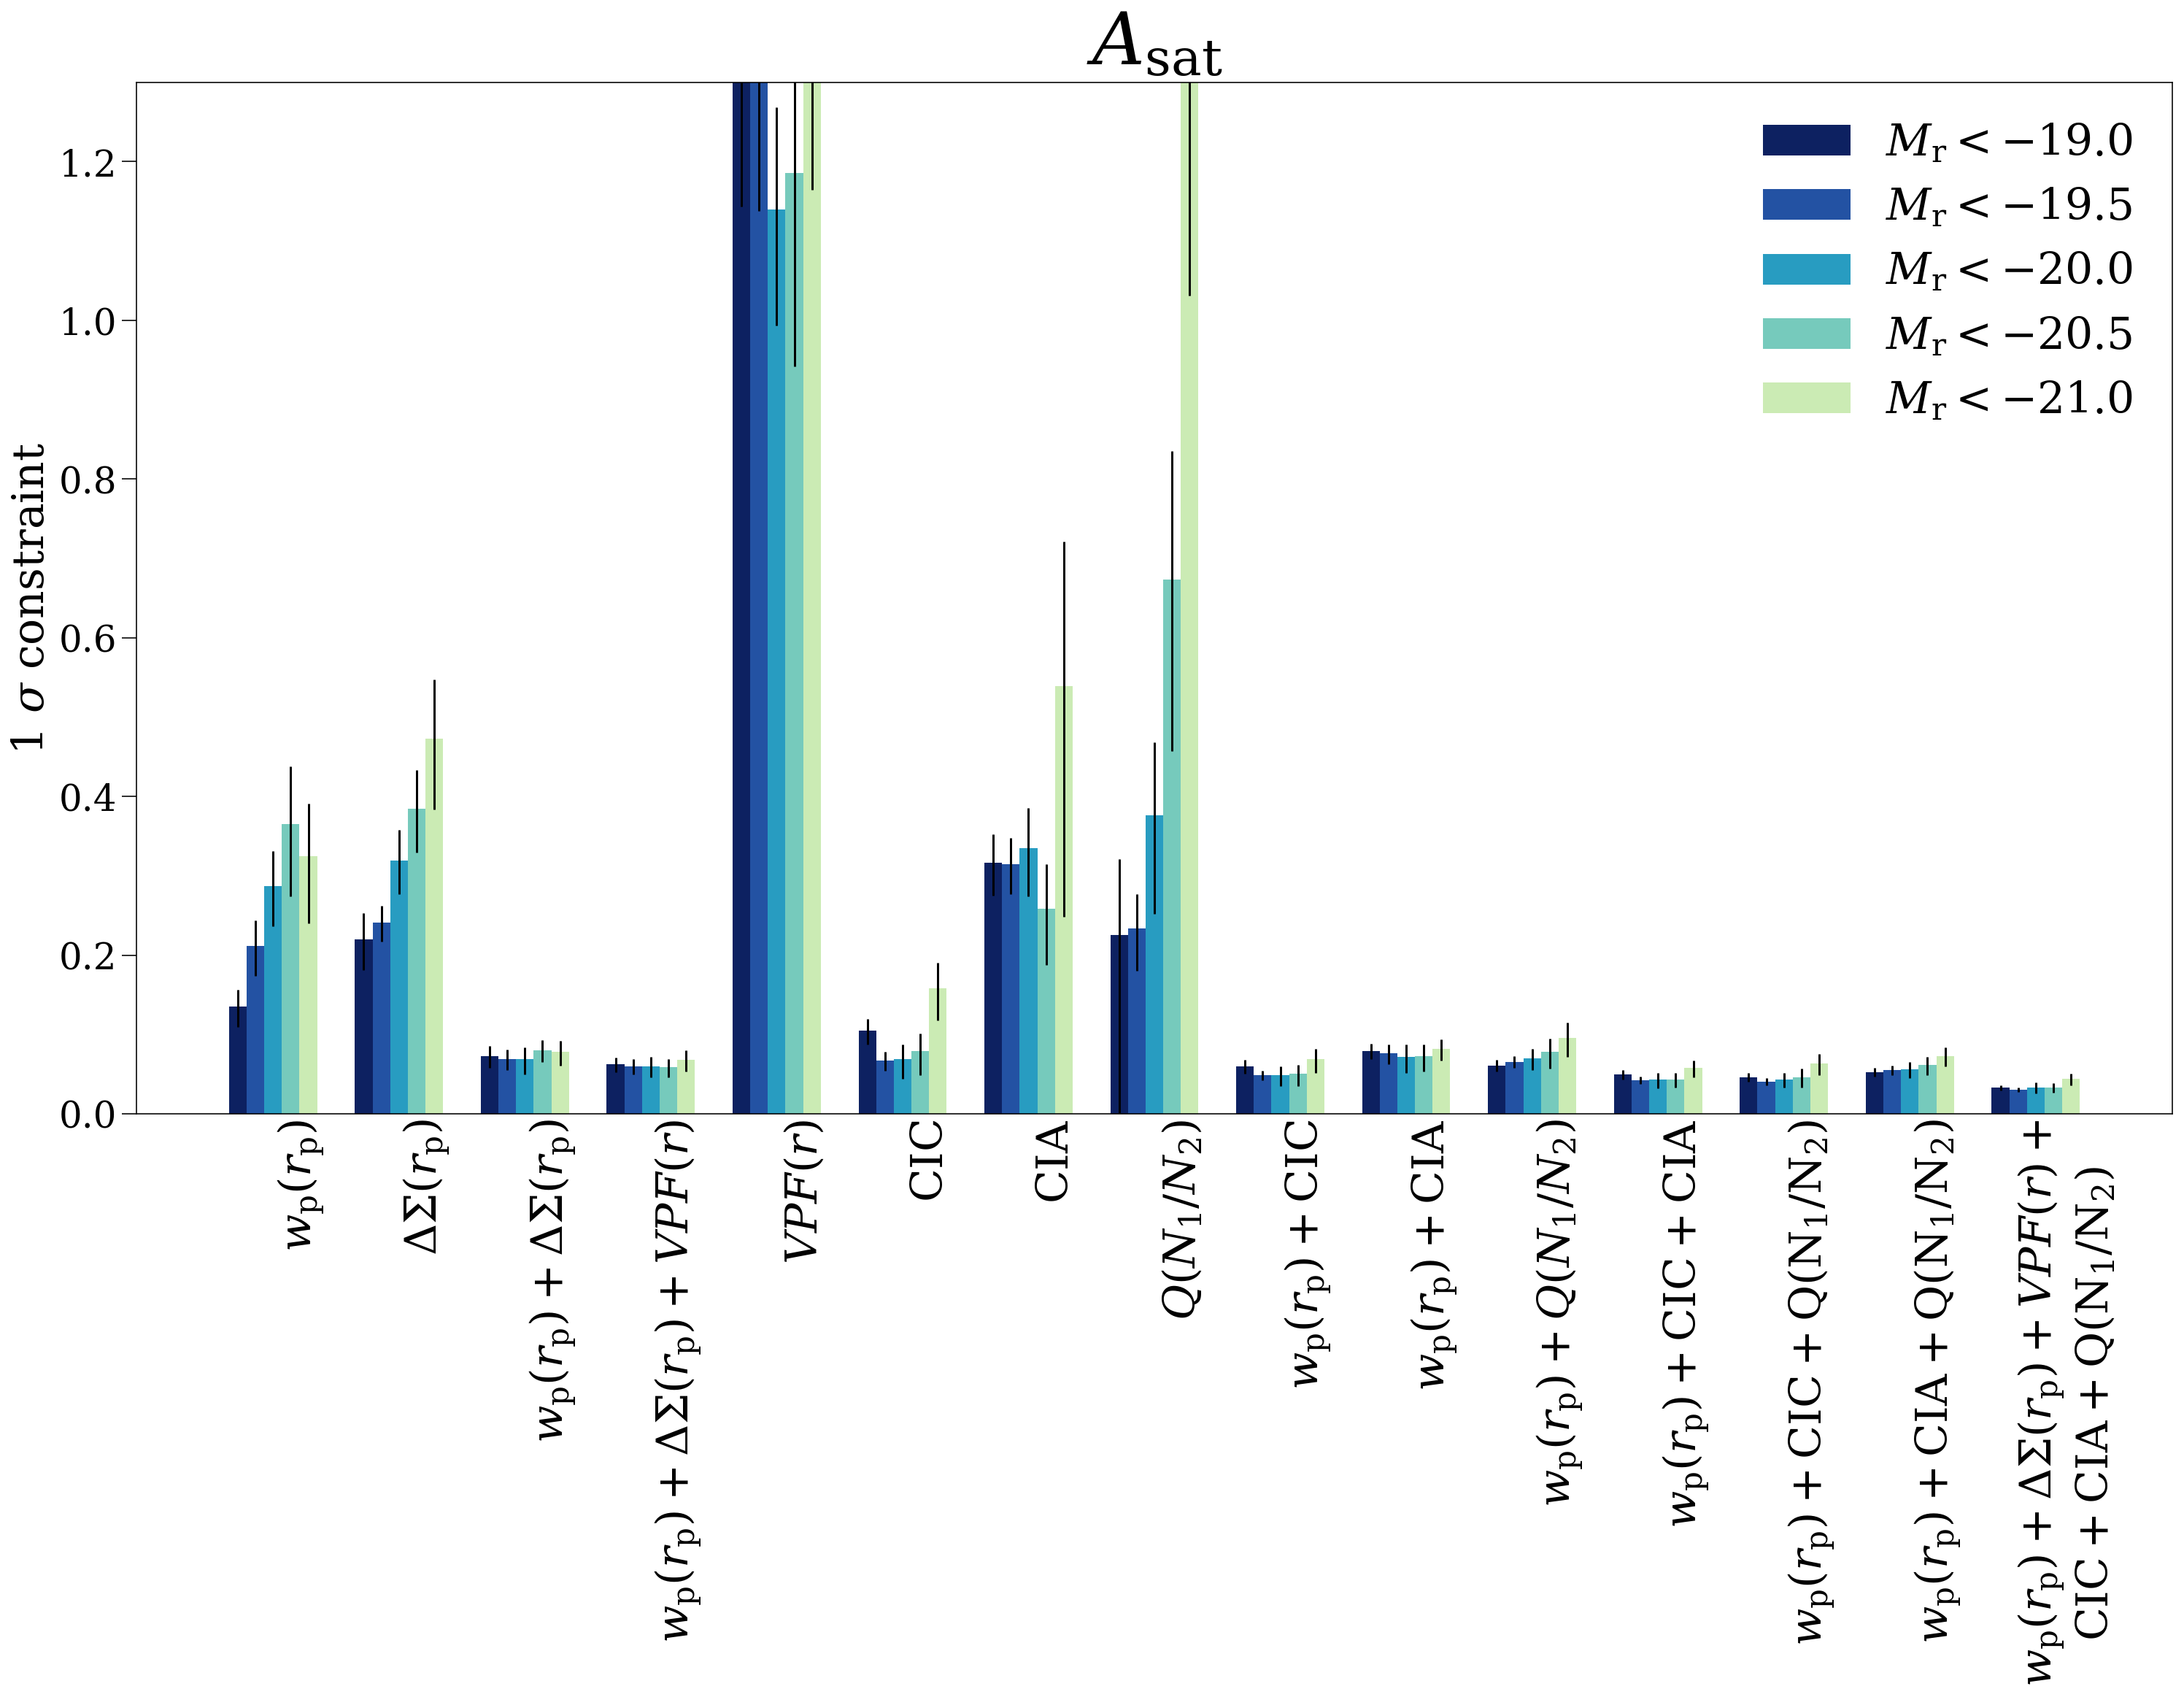

In [43]:
N = 15

ind = np.arange(N)  # the x locations for the groups
width = 0.14       # the width of the bars

fig, ax = plt.subplots(figsize=(25,13))
rects1 = ax.bar(ind, sigma_mean_19p0[combidx,6], width, color=cm.YlGnBu(250), yerr=[sigma_stdm_19p0[combidx,6],sigma_stdp_19p0[combidx,6]])
rects2 = ax.bar(ind+width, sigma_mean_19p5[combidx,6], width, color=cm.YlGnBu(200), yerr=[sigma_stdm_19p5[combidx,6],sigma_stdp_19p5[combidx,6]])
rects3 = ax.bar(ind+width*2, sigma_mean_20p0[combidx,6], width, color=cm.YlGnBu(150), yerr=[sigma_stdm_20p0[combidx,6],sigma_stdp_20p0[combidx,6]])
rects4 = ax.bar(ind+width*3, sigma_mean_20p5[combidx,6], width, color=cm.YlGnBu(100), yerr=[sigma_stdm_20p5[combidx,6],sigma_stdp_20p5[combidx,6]])
rects5 = ax.bar(ind+width*4, sigma_mean_21p0[combidx,6], width, color=cm.YlGnBu(60), yerr=[sigma_stdm_21p0[combidx,6],sigma_stdp_21p0[combidx,6]])

# add some text for labels, title and axes ticks
ax.set_ylabel(r'$1\ \sigma\ \rm{constraint}$',fontsize=30)
ax.set_title(r'$A_{\rm{sat}}$',fontsize=50)
ax.set_xticks(np.arange(N)+0.5)
ax.set_xticklabels(comblist,rotation=90,fontsize=30)
ax.set_yticklabels([0.0,0.2,0.4,0.6,0.8,1.0,1.2],fontsize=25)
ax.tick_params(axis='x',length=0)
ax.tick_params(axis='y',length=10)


ax.legend((rects1[0], rects2[0], rects3[0], rects4[0], rects5[0]),\
          (r'$M_{\rm{r}}<-19.0$',r'$M_{\rm{r}}<-19.5$',r'$M_{\rm{r}}<-20.0$',r'$M_{\rm{r}}<-20.5$',r'$M_{\rm{r}}<-21.0$'),frameon=False,fontsize=30)

ax.set_ylim(0,1.3)

plt.show()

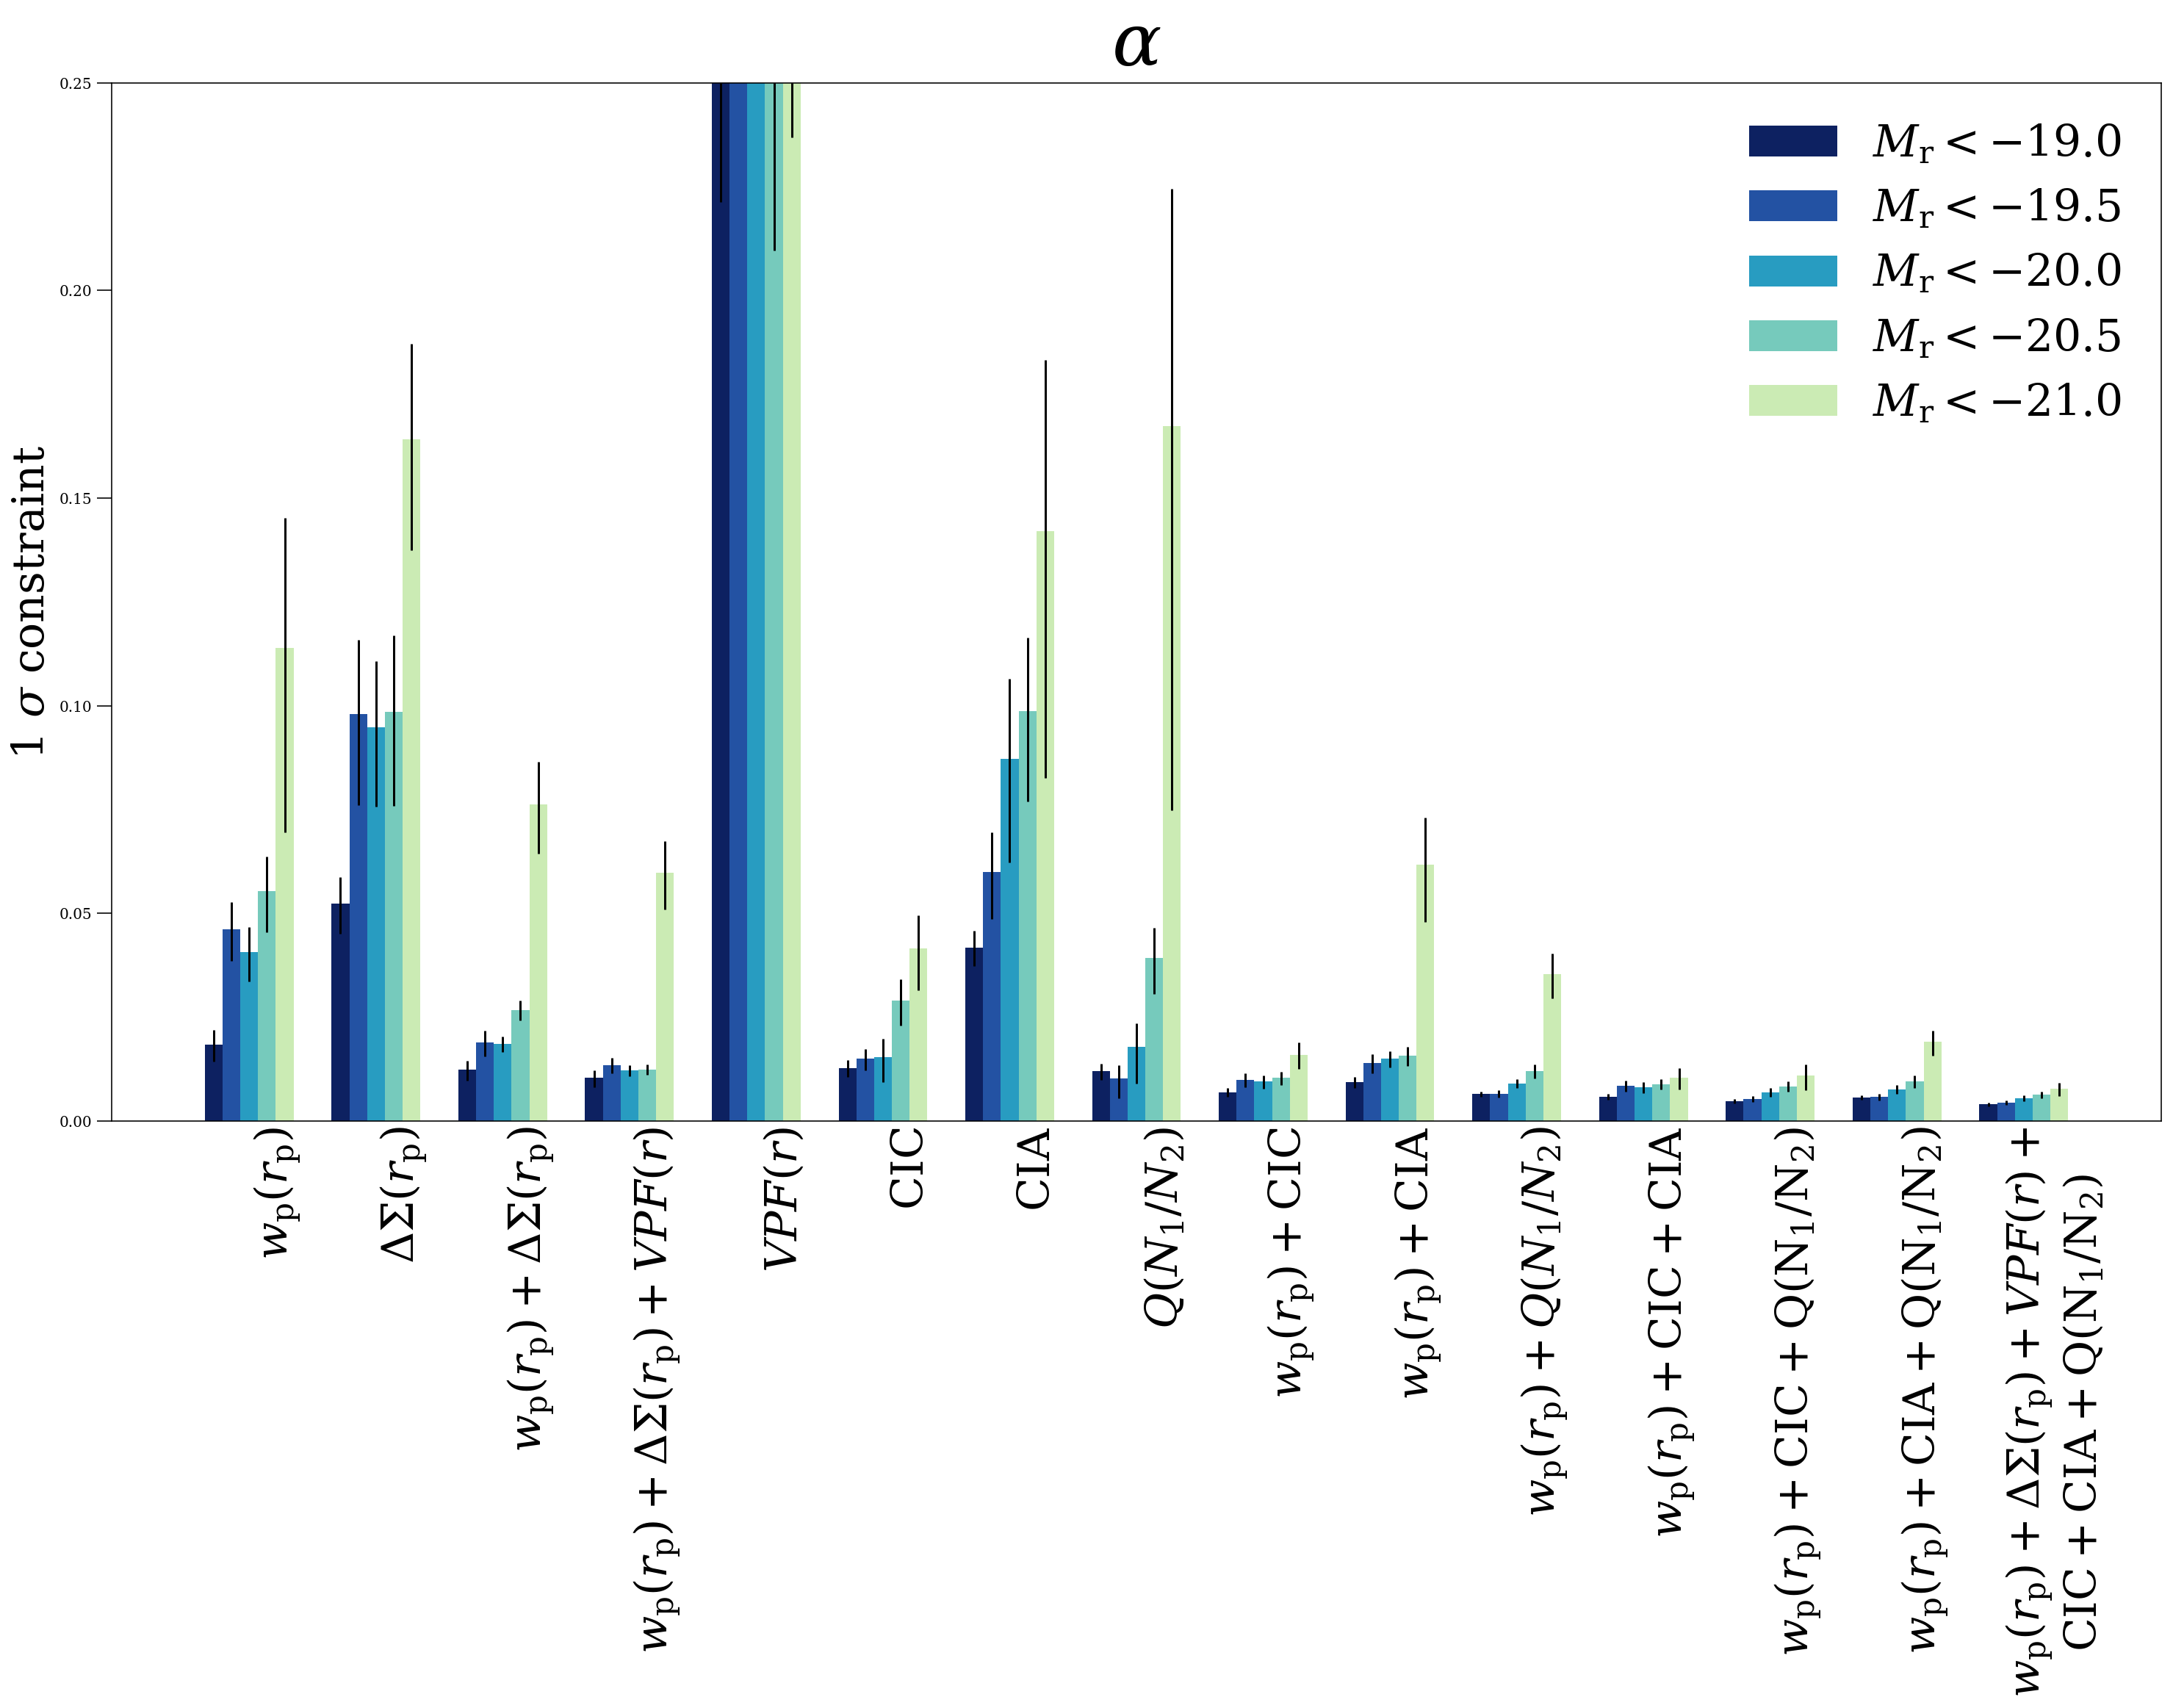

In [44]:
N = 15

ind = np.arange(N)  # the x locations for the groups
width = 0.14       # the width of the bars

fig, ax = plt.subplots(figsize=(25,13))
rects1 = ax.bar(ind, sigma_mean_19p0[combidx,0], width, color=cm.YlGnBu(250), yerr=[sigma_stdm_19p0[combidx,0],sigma_stdp_19p0[combidx,0]])
rects2 = ax.bar(ind+width, sigma_mean_19p5[combidx,0], width, color=cm.YlGnBu(200), yerr=[sigma_stdm_19p5[combidx,0],sigma_stdp_19p5[combidx,0]])
rects3 = ax.bar(ind+width*2, sigma_mean_20p0[combidx,0], width, color=cm.YlGnBu(150), yerr=[sigma_stdm_20p0[combidx,0],sigma_stdp_20p0[combidx,0]])
rects4 = ax.bar(ind+width*3, sigma_mean_20p5[combidx,0], width, color=cm.YlGnBu(100), yerr=[sigma_stdm_20p5[combidx,0],sigma_stdp_20p5[combidx,0]])
rects5 = ax.bar(ind+width*4, sigma_mean_21p0[combidx,0], width, color=cm.YlGnBu(60), yerr=[sigma_stdm_21p0[combidx,0],sigma_stdp_21p0[combidx,0]])

# add some text for labels, title and axes ticks
ax.set_ylabel(r'$1\ \sigma\ \rm{constraint}$',fontsize=30)
ax.set_title(r'$\alpha$',fontsize=50)
ax.set_xticks(np.arange(N)+0.5)
ax.set_xticklabels(comblist,rotation=90,fontsize=30)
#ax.set_yticklabels([0.0,0.2,0.4,0.6,0.8,1.0,1.2],fontsize=25)
ax.tick_params(axis='x',length=0)
ax.tick_params(axis='y',length=10)


ax.legend((rects1[0], rects2[0], rects3[0], rects4[0], rects5[0]),\
          (r'$M_{\rm{r}}<-19.0$',r'$M_{\rm{r}}<-19.5$',r'$M_{\rm{r}}<-20.0$',r'$M_{\rm{r}}<-20.5$',r'$M_{\rm{r}}<-21.0$'),frameon=False,fontsize=30)

ax.set_ylim(0,0.25)

plt.show()

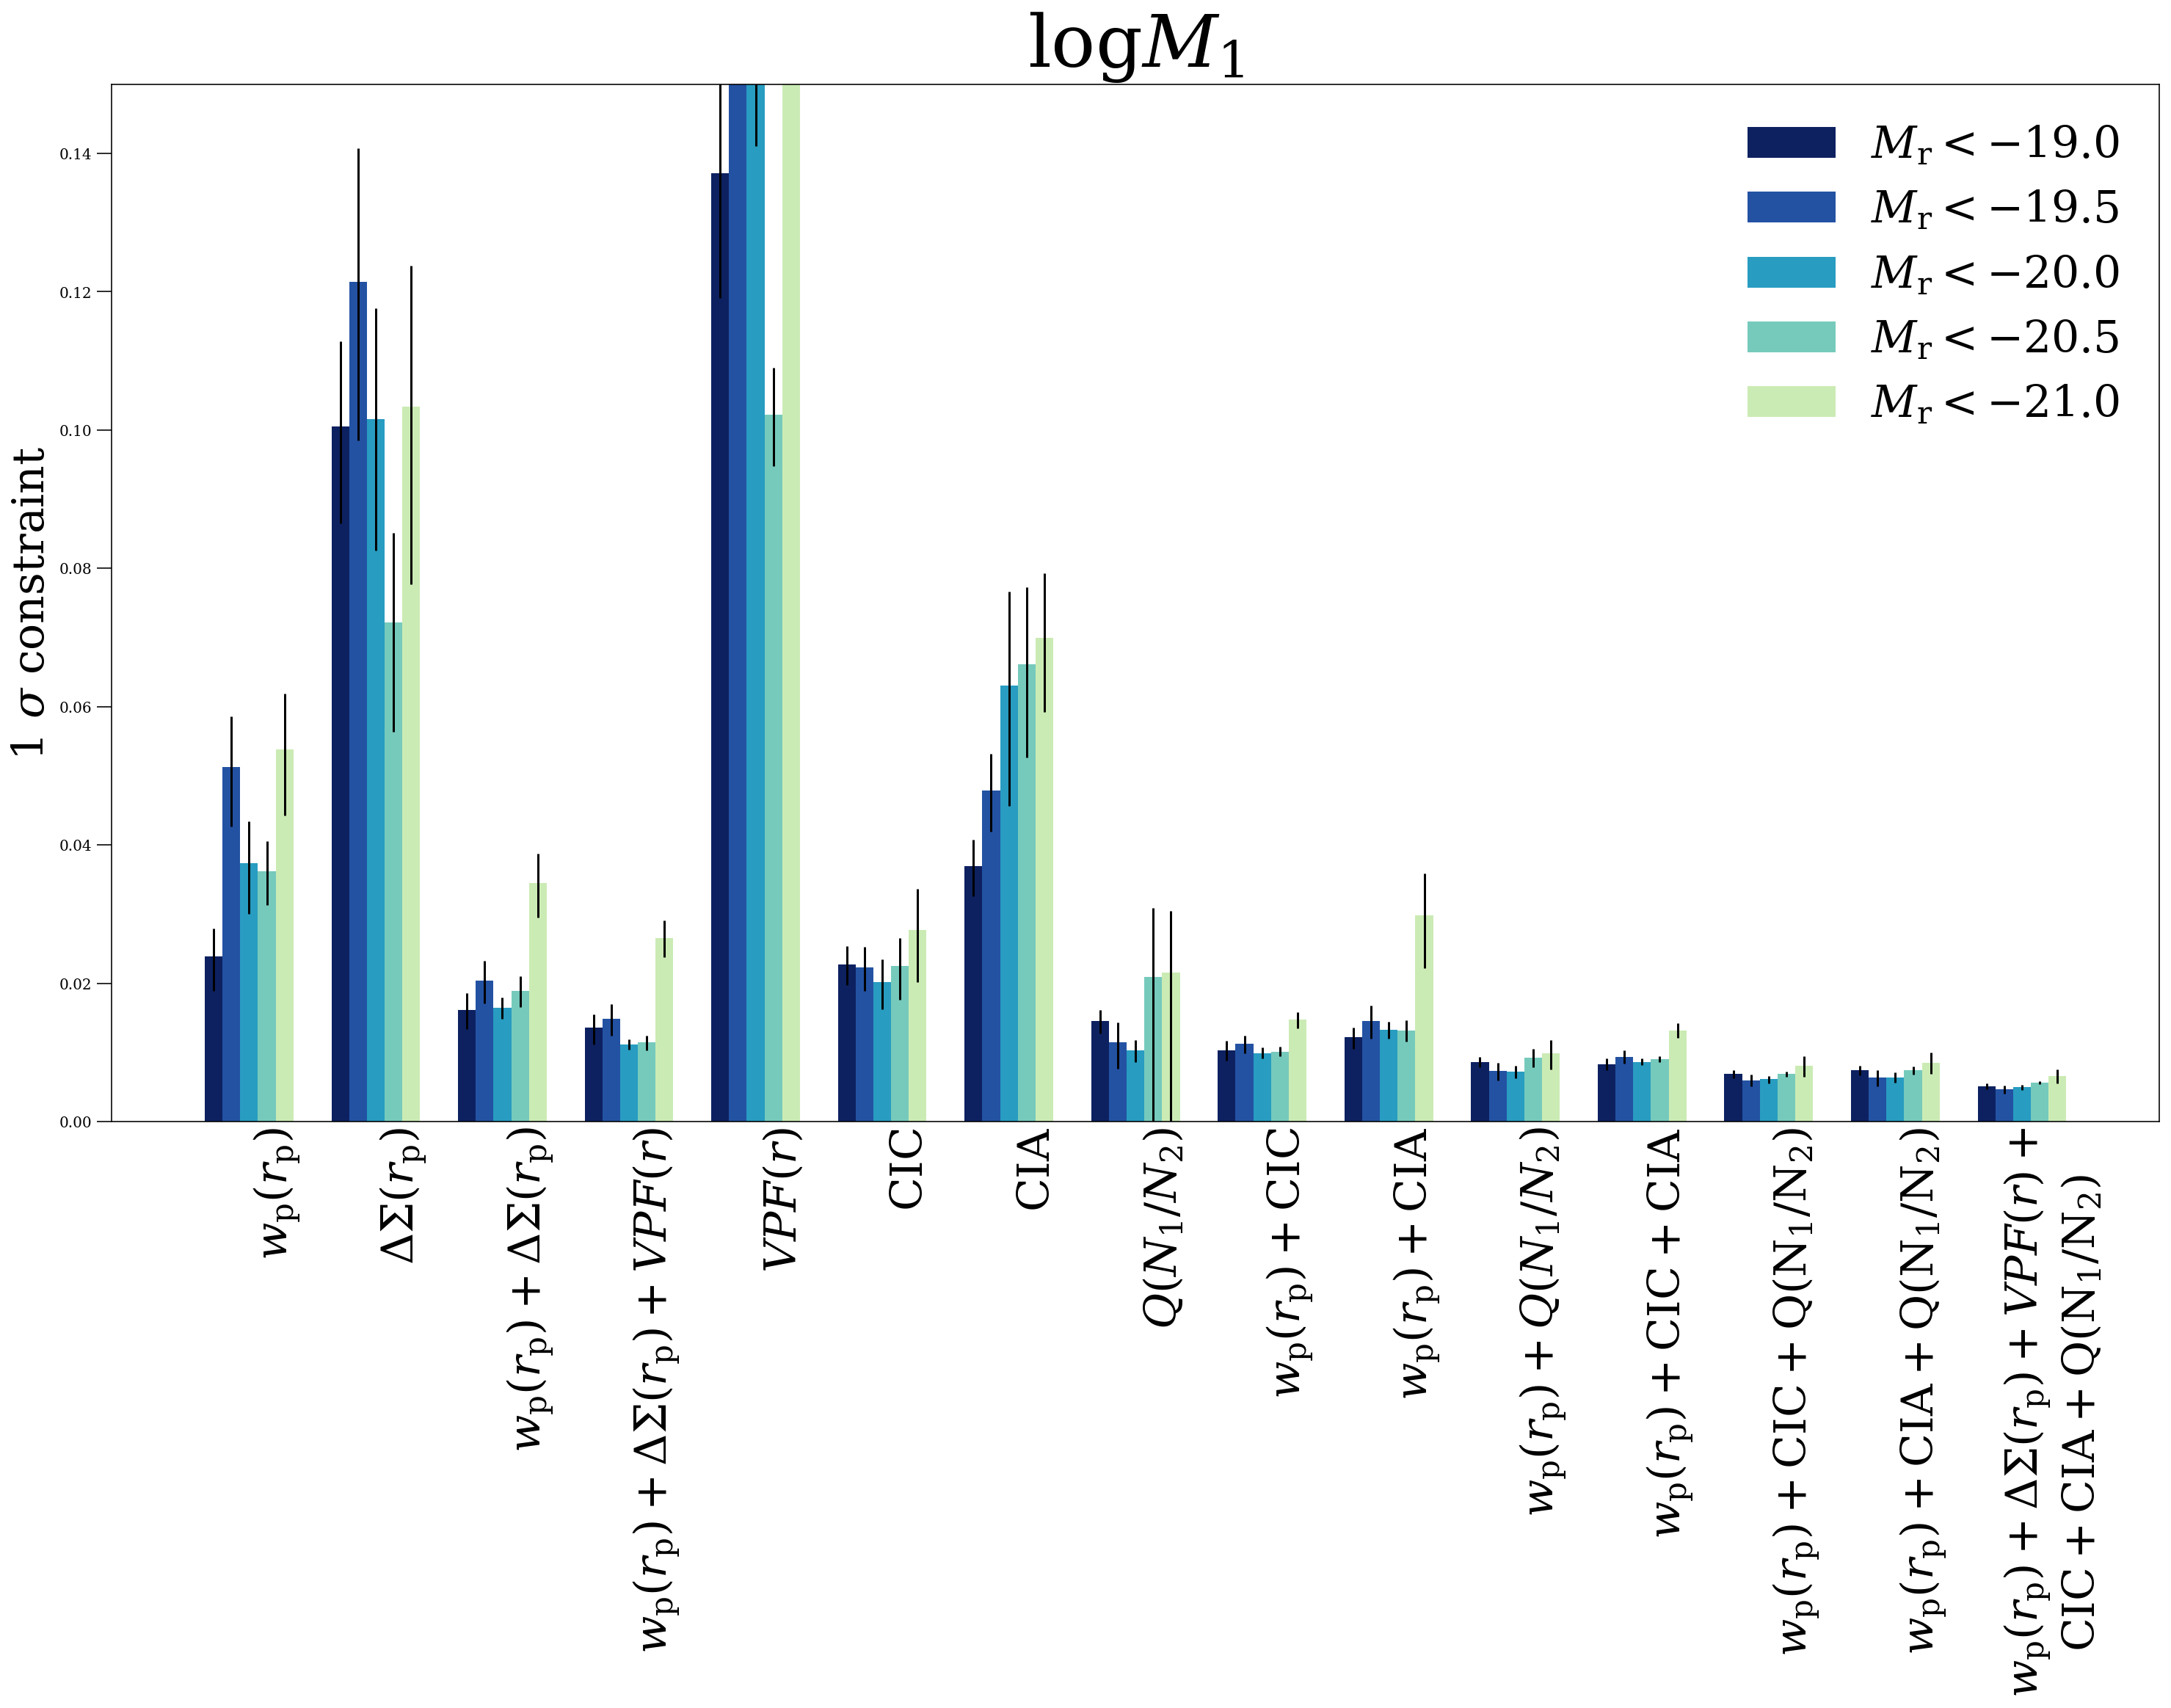

In [45]:
N = 15

ind = np.arange(N)  # the x locations for the groups
width = 0.14       # the width of the bars

fig, ax = plt.subplots(figsize=(25,13))
rects1 = ax.bar(ind, sigma_mean_19p0[combidx,1], width, color=cm.YlGnBu(250), yerr=[sigma_stdm_19p0[combidx,1],sigma_stdp_19p0[combidx,1]])
rects2 = ax.bar(ind+width, sigma_mean_19p5[combidx,1], width, color=cm.YlGnBu(200), yerr=[sigma_stdm_19p5[combidx,1],sigma_stdp_19p5[combidx,1]])
rects3 = ax.bar(ind+width*2, sigma_mean_20p0[combidx,1], width, color=cm.YlGnBu(150), yerr=[sigma_stdm_20p0[combidx,1],sigma_stdp_20p0[combidx,1]])
rects4 = ax.bar(ind+width*3, sigma_mean_20p5[combidx,1], width, color=cm.YlGnBu(100), yerr=[sigma_stdm_20p5[combidx,1],sigma_stdp_20p5[combidx,1]])
rects5 = ax.bar(ind+width*4, sigma_mean_21p0[combidx,1], width, color=cm.YlGnBu(60), yerr=[sigma_stdm_21p0[combidx,1],sigma_stdp_21p0[combidx,1]])

# add some text for labels, title and axes ticks
ax.set_ylabel(r'$1\ \sigma\ \rm{constraint}$',fontsize=30)
ax.set_title(param_list[1],fontsize=50)
ax.set_xticks(np.arange(N)+0.5)
ax.set_xticklabels(comblist,rotation=90,fontsize=30)
#ax.set_yticklabels([0.0,0.2,0.4,0.6,0.8,1.0,1.2],fontsize=25)
ax.tick_params(axis='x',length=0)
ax.tick_params(axis='y',length=10)


ax.legend((rects1[0], rects2[0], rects3[0], rects4[0], rects5[0]),\
          (r'$M_{\rm{r}}<-19.0$',r'$M_{\rm{r}}<-19.5$',r'$M_{\rm{r}}<-20.0$',r'$M_{\rm{r}}<-20.5$',r'$M_{\rm{r}}<-21.0$'),frameon=False,fontsize=30)

ax.set_ylim(0,0.15)

plt.show()

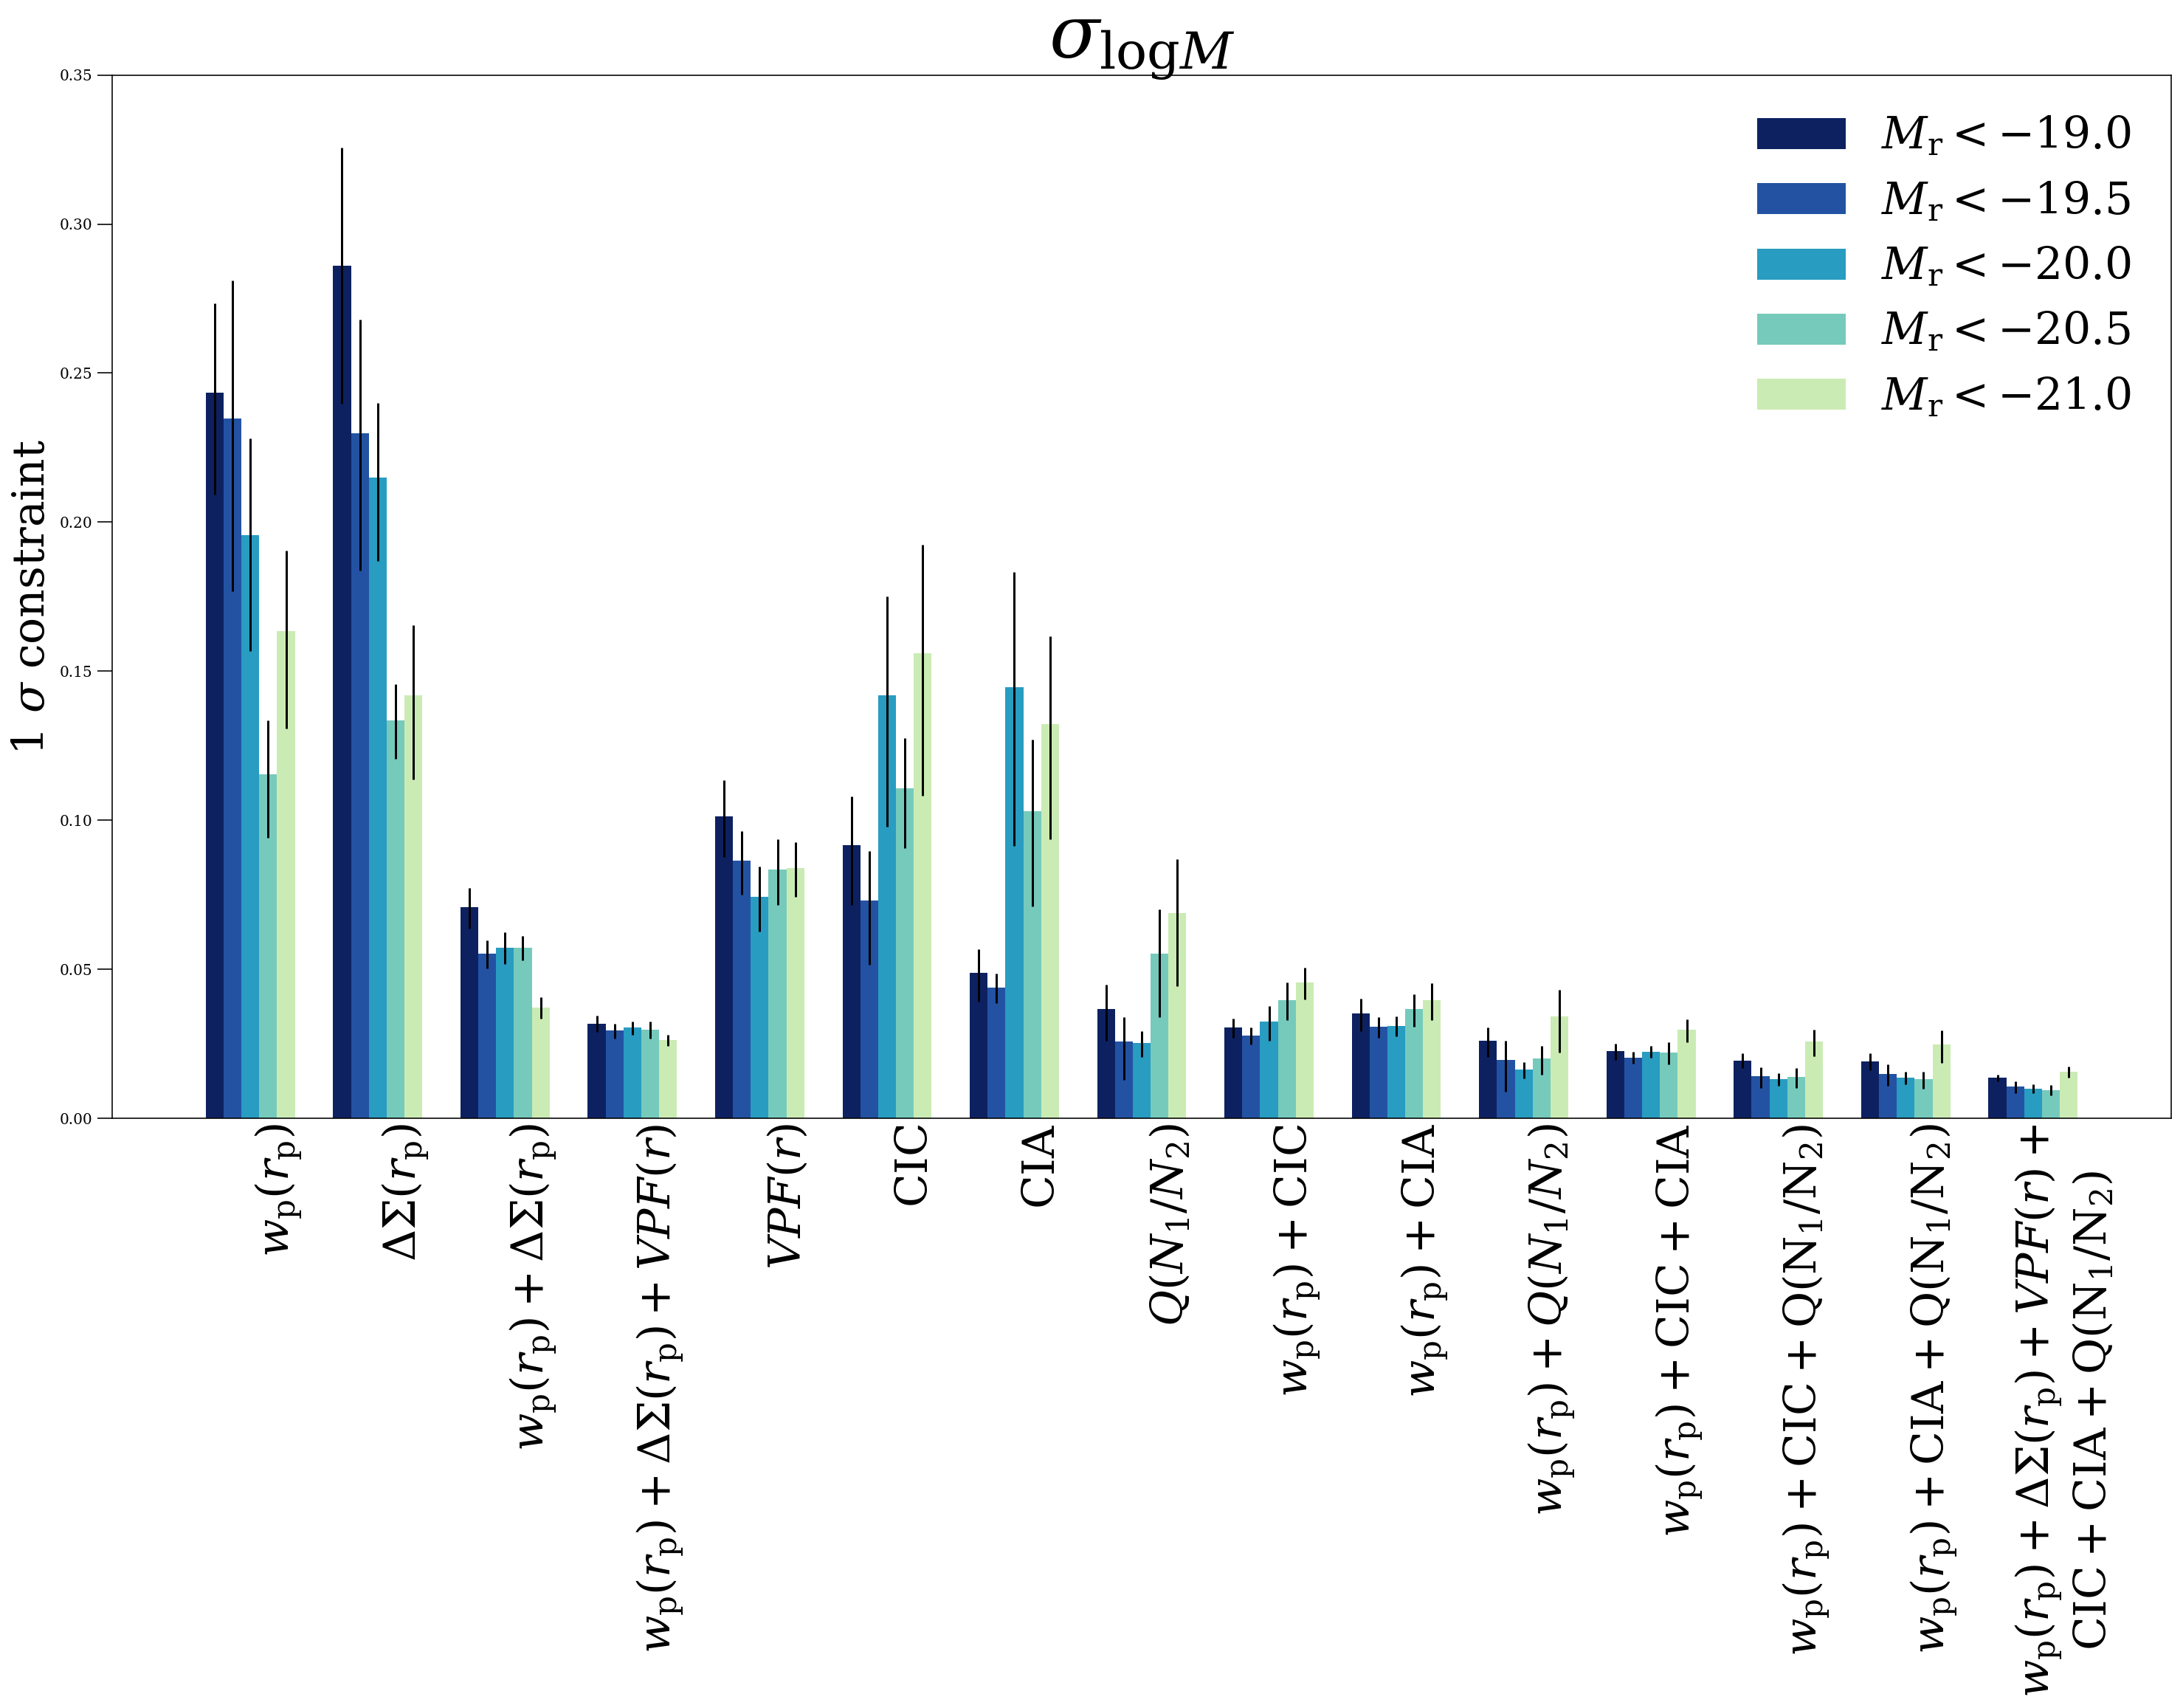

In [46]:
N = 15

ind = np.arange(N)  # the x locations for the groups
width = 0.14       # the width of the bars

fig, ax = plt.subplots(figsize=(25,13))
rects1 = ax.bar(ind, sigma_mean_19p0[combidx,2], width, color=cm.YlGnBu(250), yerr=[sigma_stdm_19p0[combidx,2],sigma_stdp_19p0[combidx,2]])
rects2 = ax.bar(ind+width, sigma_mean_19p5[combidx,2], width, color=cm.YlGnBu(200), yerr=[sigma_stdm_19p5[combidx,2],sigma_stdp_19p5[combidx,2]])
rects3 = ax.bar(ind+width*2, sigma_mean_20p0[combidx,2], width, color=cm.YlGnBu(150), yerr=[sigma_stdm_20p0[combidx,2],sigma_stdp_20p0[combidx,2]])
rects4 = ax.bar(ind+width*3, sigma_mean_20p5[combidx,2], width, color=cm.YlGnBu(100), yerr=[sigma_stdm_20p5[combidx,2],sigma_stdp_20p5[combidx,2]])
rects5 = ax.bar(ind+width*4, sigma_mean_21p0[combidx,2], width, color=cm.YlGnBu(60), yerr=[sigma_stdm_21p0[combidx,2],sigma_stdp_21p0[combidx,2]])

# add some text for labels, title and axes ticks
ax.set_ylabel(r'$1\ \sigma\ \rm{constraint}$',fontsize=30)
ax.set_title(param_list[2],fontsize=50)
ax.set_xticks(np.arange(N)+0.5)
ax.set_xticklabels(comblist,rotation=90,fontsize=30)
#ax.set_yticklabels([0.0,0.2,0.4,0.6,0.8,1.0,1.2],fontsize=25)
ax.tick_params(axis='x',length=0)
ax.tick_params(axis='y',length=10)


ax.legend((rects1[0], rects2[0], rects3[0], rects4[0], rects5[0]),\
          (r'$M_{\rm{r}}<-19.0$',r'$M_{\rm{r}}<-19.5$',r'$M_{\rm{r}}<-20.0$',r'$M_{\rm{r}}<-20.5$',r'$M_{\rm{r}}<-21.0$'),frameon=False,fontsize=30)

ax.set_ylim(0,0.35)

plt.show()

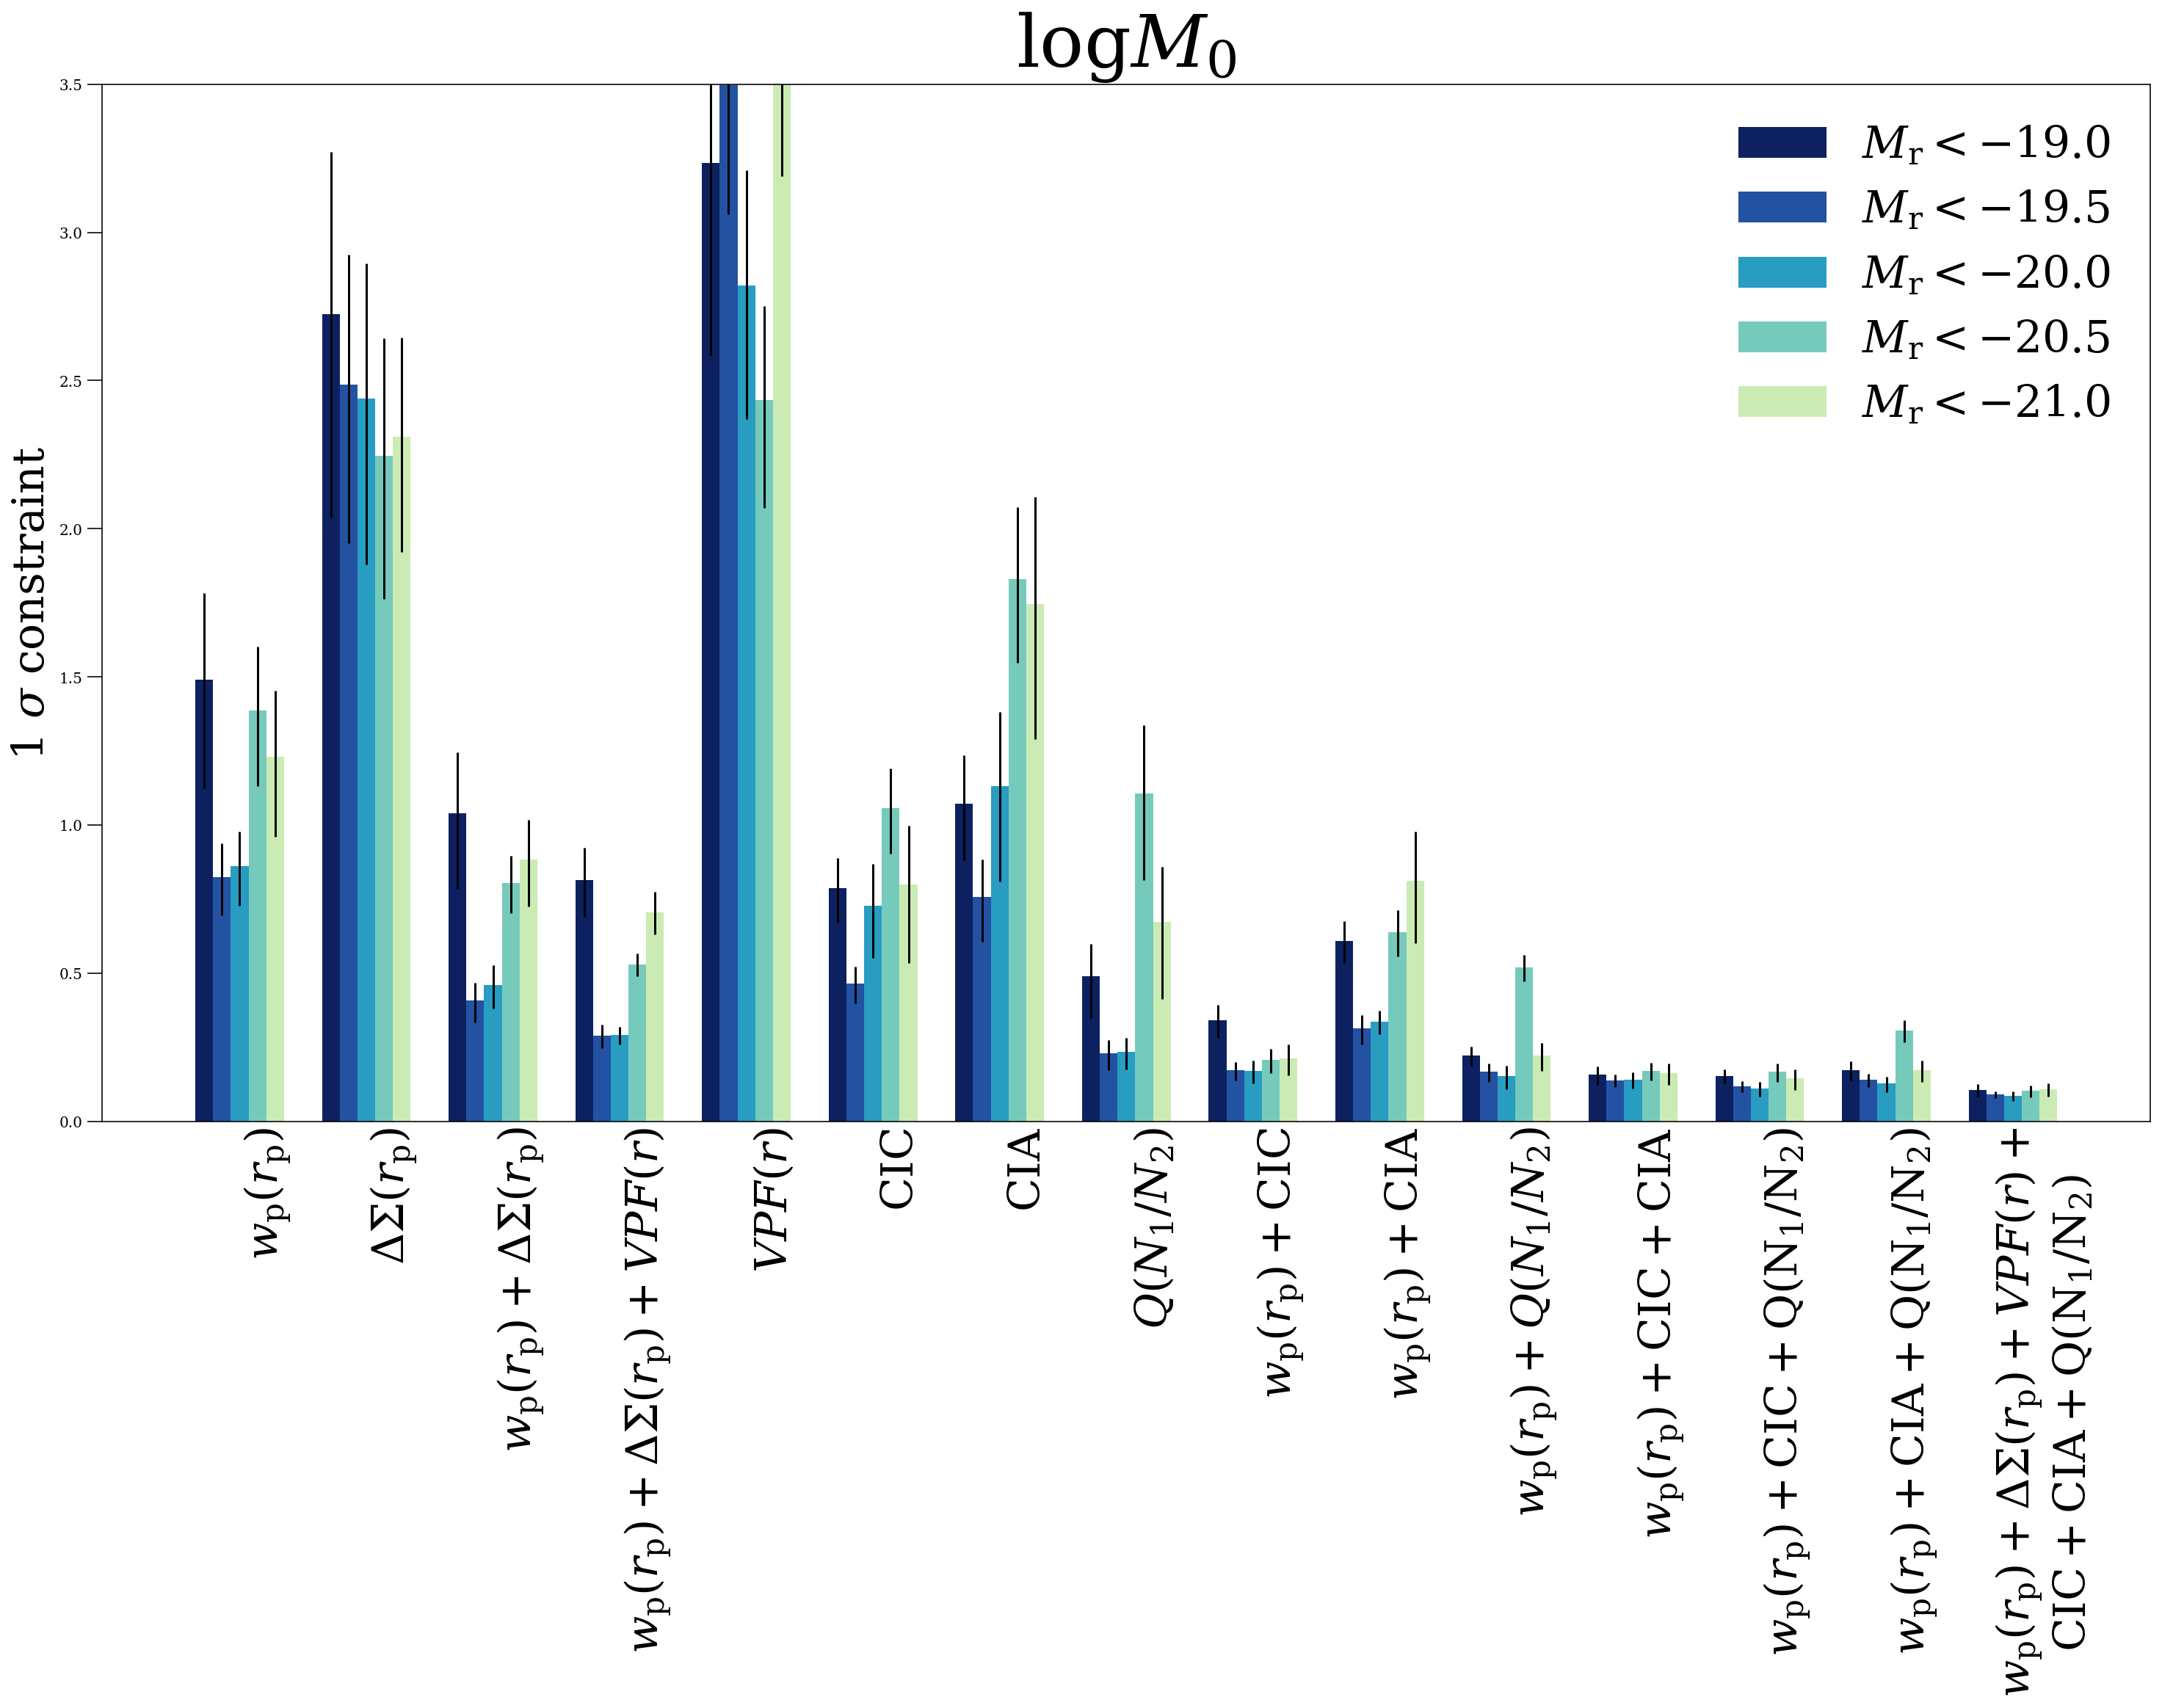

In [47]:
N = 15

ind = np.arange(N)  # the x locations for the groups
width = 0.14       # the width of the bars

fig, ax = plt.subplots(figsize=(25,13))
rects1 = ax.bar(ind, sigma_mean_19p0[combidx,3], width, color=cm.YlGnBu(250), yerr=[sigma_stdm_19p0[combidx,3],sigma_stdp_19p0[combidx,3]])
rects2 = ax.bar(ind+width, sigma_mean_19p5[combidx,3], width, color=cm.YlGnBu(200), yerr=[sigma_stdm_19p5[combidx,3],sigma_stdp_19p5[combidx,3]])
rects3 = ax.bar(ind+width*2, sigma_mean_20p0[combidx,3], width, color=cm.YlGnBu(150), yerr=[sigma_stdm_20p0[combidx,3],sigma_stdp_20p0[combidx,3]])
rects4 = ax.bar(ind+width*3, sigma_mean_20p5[combidx,3], width, color=cm.YlGnBu(100), yerr=[sigma_stdm_20p5[combidx,3],sigma_stdp_20p5[combidx,3]])
rects5 = ax.bar(ind+width*4, sigma_mean_21p0[combidx,3], width, color=cm.YlGnBu(60), yerr=[sigma_stdm_21p0[combidx,3],sigma_stdp_21p0[combidx,3]])

# add some text for labels, title and axes ticks
ax.set_ylabel(r'$1\ \sigma\ \rm{constraint}$',fontsize=30)
ax.set_title(param_list[3],fontsize=50)
ax.set_xticks(np.arange(N)+0.5)
ax.set_xticklabels(comblist,rotation=90,fontsize=30)
#ax.set_yticklabels([0.0,0.2,0.4,0.6,0.8,1.0,1.2],fontsize=25)
ax.tick_params(axis='x',length=0)
ax.tick_params(axis='y',length=10)


ax.legend((rects1[0], rects2[0], rects3[0], rects4[0], rects5[0]),\
          (r'$M_{\rm{r}}<-19.0$',r'$M_{\rm{r}}<-19.5$',r'$M_{\rm{r}}<-20.0$',r'$M_{\rm{r}}<-20.5$',r'$M_{\rm{r}}<-21.0$'),frameon=False,fontsize=30)

ax.set_ylim(0,3.5)

plt.show()

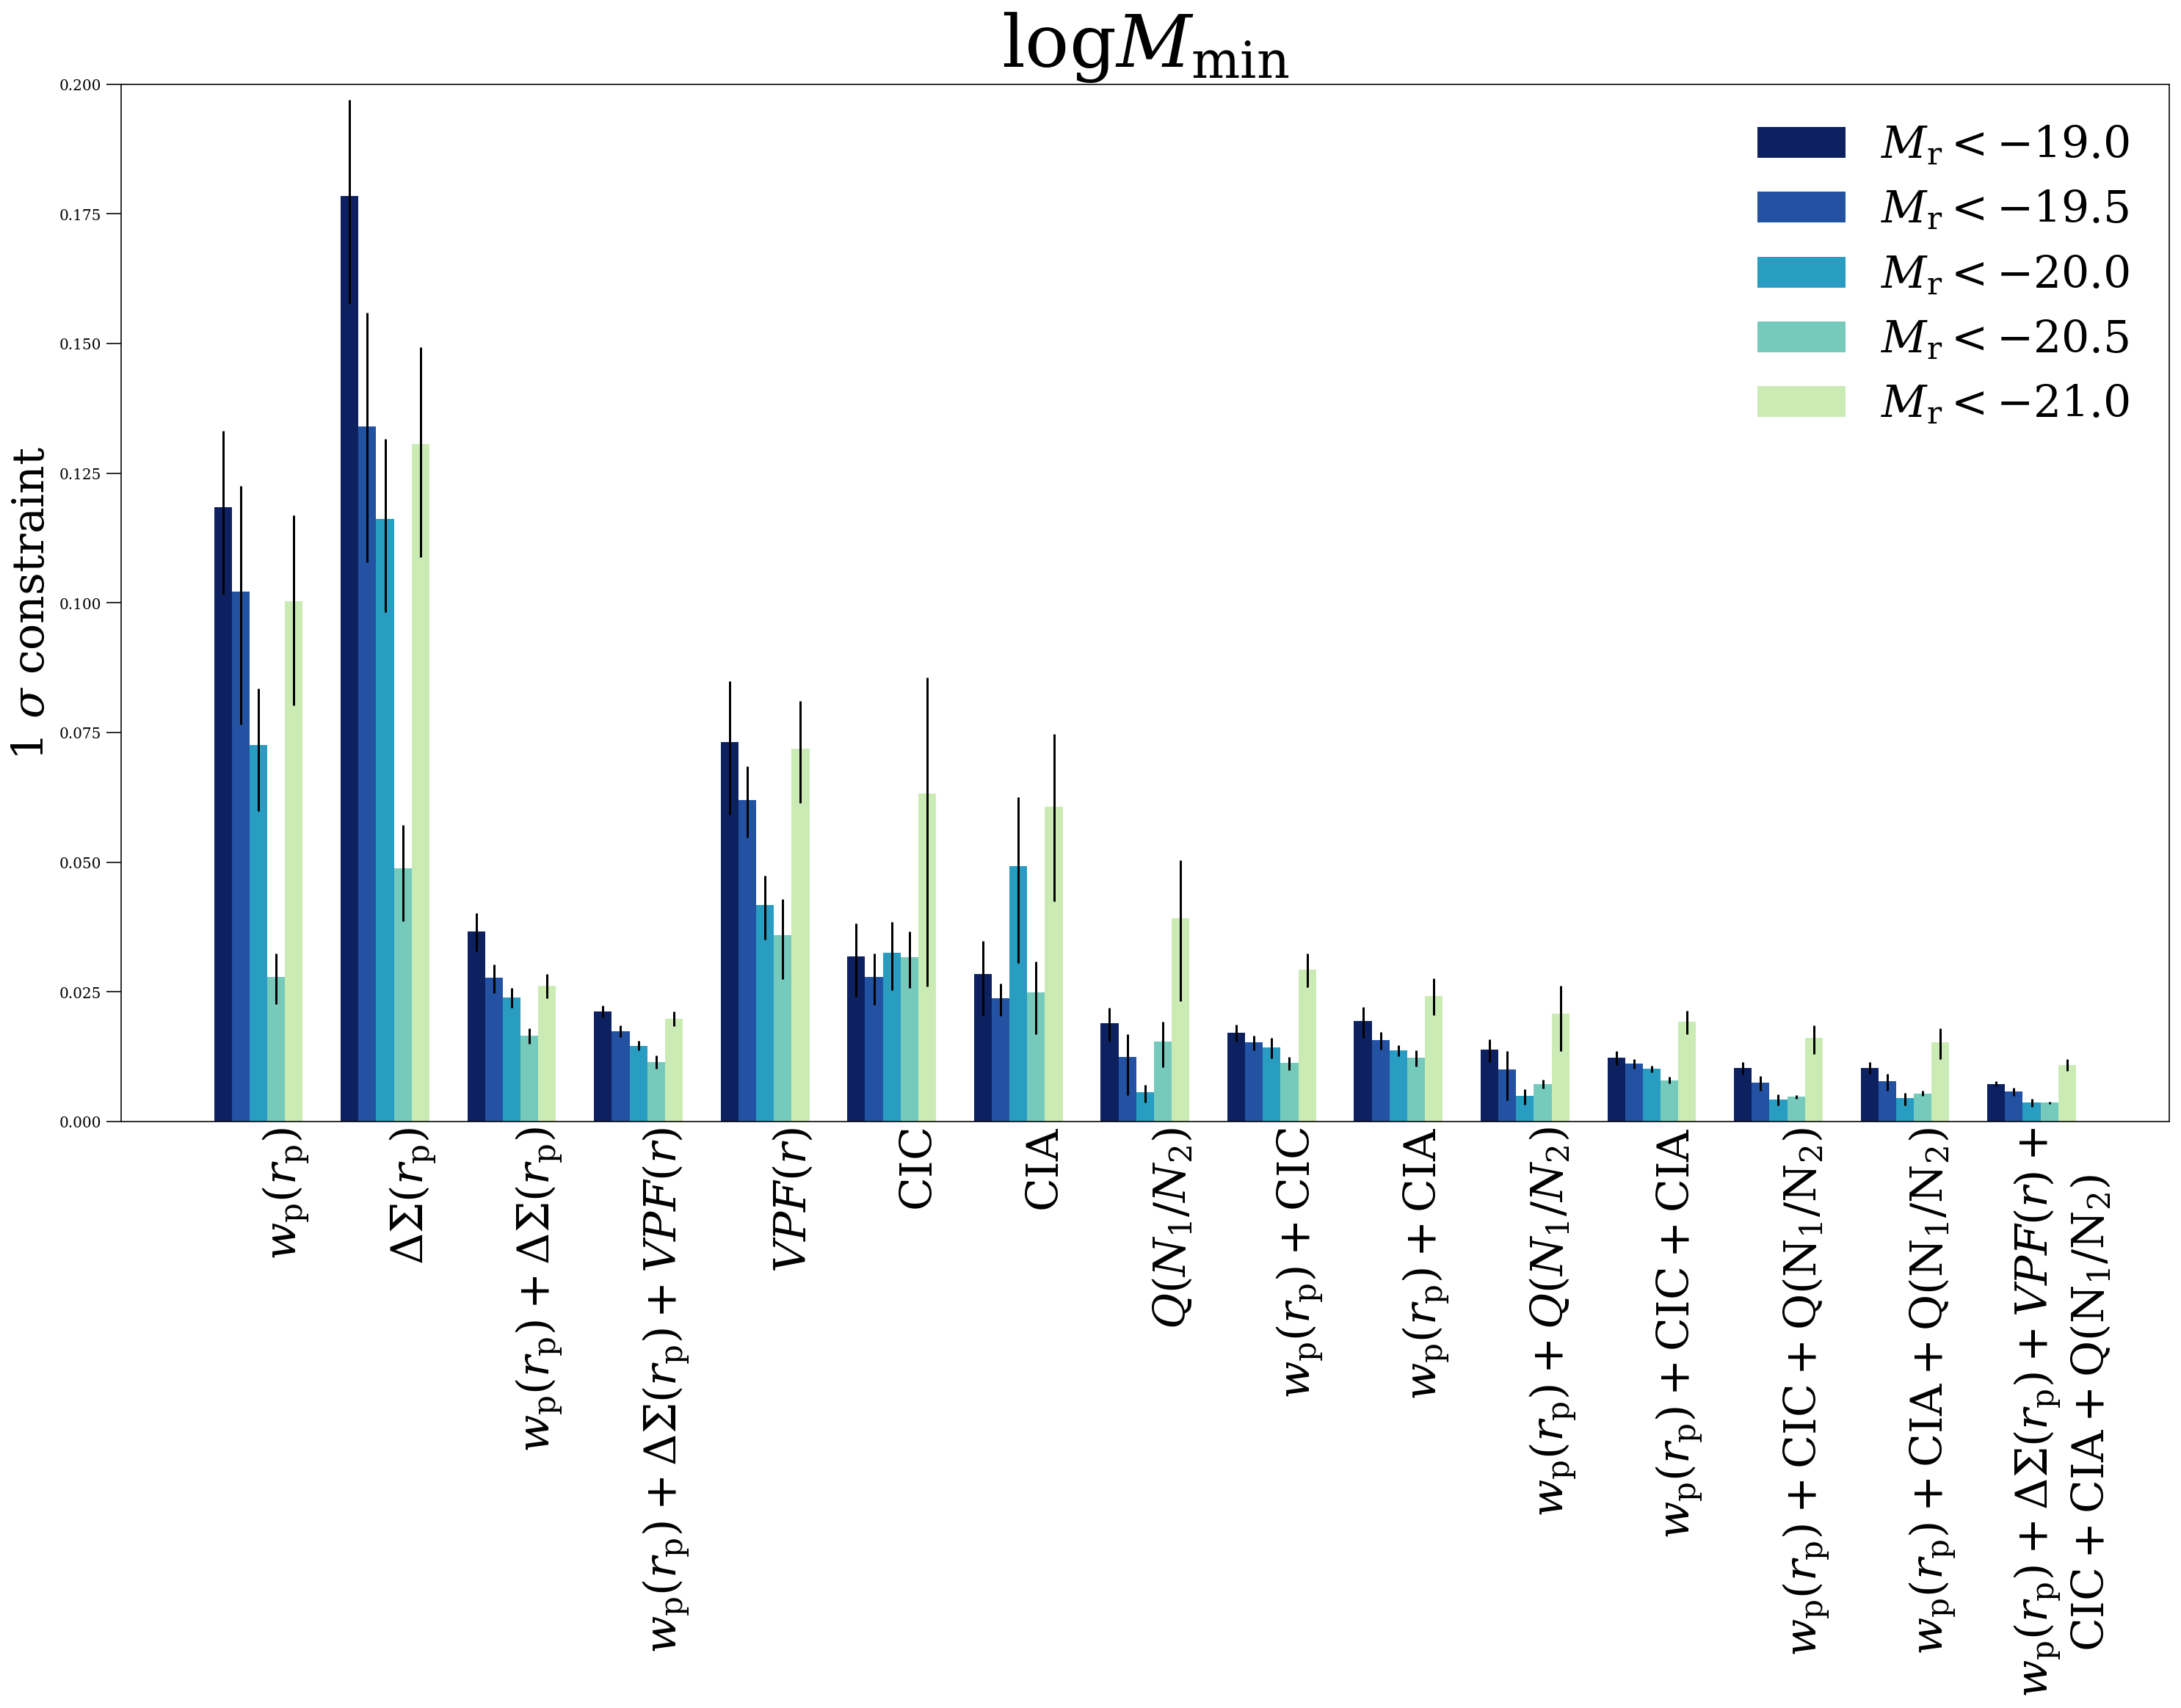

In [48]:
N = 15

ind = np.arange(N)  # the x locations for the groups
width = 0.14       # the width of the bars

fig, ax = plt.subplots(figsize=(25,13))
rects1 = ax.bar(ind, sigma_mean_19p0[combidx,4], width, color=cm.YlGnBu(250), yerr=[sigma_stdm_19p0[combidx,4],sigma_stdp_19p0[combidx,4]])
rects2 = ax.bar(ind+width, sigma_mean_19p5[combidx,4], width, color=cm.YlGnBu(200), yerr=[sigma_stdm_19p5[combidx,4],sigma_stdp_19p5[combidx,4]])
rects3 = ax.bar(ind+width*2, sigma_mean_20p0[combidx,4], width, color=cm.YlGnBu(150), yerr=[sigma_stdm_20p0[combidx,4],sigma_stdp_20p0[combidx,4]])
rects4 = ax.bar(ind+width*3, sigma_mean_20p5[combidx,4], width, color=cm.YlGnBu(100), yerr=[sigma_stdm_20p5[combidx,4],sigma_stdp_20p5[combidx,4]])
rects5 = ax.bar(ind+width*4, sigma_mean_21p0[combidx,4], width, color=cm.YlGnBu(60), yerr=[sigma_stdm_21p0[combidx,4],sigma_stdp_21p0[combidx,4]])

# add some text for labels, title and axes ticks
ax.set_ylabel(r'$1\ \sigma\ \rm{constraint}$',fontsize=30)
ax.set_title(param_list[4],fontsize=50)
ax.set_xticks(np.arange(N)+0.5)
ax.set_xticklabels(comblist,rotation=90,fontsize=30)
#ax.set_yticklabels([0.0,0.2,0.4,0.6,0.8,1.0,1.2],fontsize=25)
ax.tick_params(axis='x',length=0)
ax.tick_params(axis='y',length=10)


ax.legend((rects1[0], rects2[0], rects3[0], rects4[0], rects5[0]),\
          (r'$M_{\rm{r}}<-19.0$',r'$M_{\rm{r}}<-19.5$',r'$M_{\rm{r}}<-20.0$',r'$M_{\rm{r}}<-20.5$',r'$M_{\rm{r}}<-21.0$'),frameon=False,fontsize=30)

ax.set_ylim(0,0.2)

plt.show()